### Description:


The bank managers want to know, who is a good client (whom to offer some additional services) and who is a bad client 
(whom to watch carefully to minimize the bank loses). Fortunately, the bank stores data about their clients, 
the accounts (transactions within several months), the loans already granted, the credit cards issued. 
The bank managers hope to improve their understanding of customers and seek specific actions to improve services.

### Outline:

1.Data Extraction

2.Data Cleaning

3.Exploratory Data Analysis

4.Data Preprocessing

5.Cluster Analysis

### Objective:

Using agglomerative and kmeans clustering algorithms to analyse the bank data in order to extrapolate from it the type of customer who makes a good candidate for a credit card.

### Import Libraries

In [2]:
%matplotlib inline
import datetime as dt
import pyodbc 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# data colelctFion and preprocessing
#from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
# for data visualisation and statistical analysis
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import tree
from sklearn import preprocessing
plt.rc("font", size=14)
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
import pyodbc
pyodbc.connect

cnxn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=DESKTOP-TI5OC9C;"
            "Database=CreditCard;"
            "Trusted_Connection=yes;")


cnxn = pyodbc.connect(cnxn_str)


### 1. Account Data

In [5]:
account = pd.read_sql("""select 

*


from [dbo].[account]  
""", cnxn)

In [6]:
account.head(10)

,"""account_id""","""district_id""","""frequency""","""date"""
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102
5,1972,77,POPLATEK MESICNE,930102
6,1539,1,POPLATEK PO OBRATU,930103
7,793,47,POPLATEK MESICNE,930103
8,2484,74,POPLATEK MESICNE,930103
9,1695,76,POPLATEK MESICNE,930103


In [7]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   "account_id"   4500 non-null   object
 1   "district_id"  4500 non-null   object
 2   "frequency"    4500 non-null   object
 3   "date"         4500 non-null   object
dtypes: object(4)
memory usage: 140.8+ KB


In [8]:
account.shape

(4500, 4)

In [9]:
account.isnull().sum()

"account_id"     0
"district_id"    0
"frequency"      0
"date"           0
dtype: int64

In [10]:
print("Number of duplicated data:", account.duplicated().sum())

Number of duplicated data: 0


In [11]:
# removing quotes

account = account.applymap(lambda x: x.replace('"', ''))

rm_quote = lambda x: x.replace('"', '')
account = account.rename(columns=rm_quote)

account.head(10)

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102
5,1972,77,POPLATEK MESICNE,930102
6,1539,1,POPLATEK PO OBRATU,930103
7,793,47,POPLATEK MESICNE,930103
8,2484,74,POPLATEK MESICNE,930103
9,1695,76,POPLATEK MESICNE,930103


In [12]:
account.dtypes

account_id     object
district_id    object
frequency      object
date           object
dtype: object

In [13]:
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [14]:
account.drop(['date'], axis=1,inplace=True)
account.head()

,account_id,district_id,frequency
0,576,55,POPLATEK MESICNE
1,3818,74,POPLATEK MESICNE
2,704,55,POPLATEK MESICNE
3,2378,16,POPLATEK MESICNE
4,2632,24,POPLATEK MESICNE


In [15]:
# No. of each frequency

for i in account.select_dtypes(exclude=['number','datetime']):
  unique_data = account[i].value_counts()
  print(unique_data.to_markdown(), '\n\n')

|       |   account_id |
|------:|-------------:|
|   576 |            1 |
|  6453 |            1 |
|   836 |            1 |
|  3192 |            1 |
|  4389 |            1 |
|  1900 |            1 |
|  2291 |            1 |
|  7907 |            1 |
|  3491 |            1 |
|  7424 |            1 |
| 11027 |            1 |
|  3443 |            1 |
|  1490 |            1 |
|  2983 |            1 |
|  2717 |            1 |
|  3932 |            1 |
|  3880 |            1 |
|  1187 |            1 |
|   593 |            1 |
|   194 |            1 |
|  2350 |            1 |
|  2278 |            1 |
|  4071 |            1 |
|  3040 |            1 |
|  9159 |            1 |
|   371 |            1 |
|  1906 |            1 |
|    25 |            1 |
|  9646 |            1 |
|  3359 |            1 |
|  1985 |            1 |
|  1160 |            1 |
|  1571 |            1 |
| 10954 |            1 |
|   303 |            1 |
|  3511 |            1 |
|  6495 |            1 |
|  2266 |            1 |


In [16]:
# Renaming frequency values

ori_val = ['POPLATEK MESICNE','POPLATEK TYDNE','POPLATEK PO OBRATU']
trf_val = ['MONTHLY ISSUANCE','WEEKLY ISSUANCE','ISSUANCE AFTER TRANSACTION']

account['frequency'] = account['frequency'].replace(ori_val, trf_val)



In [17]:
account.head()

,account_id,district_id,frequency
0,576,55,MONTHLY ISSUANCE
1,3818,74,MONTHLY ISSUANCE
2,704,55,MONTHLY ISSUANCE
3,2378,16,MONTHLY ISSUANCE
4,2632,24,MONTHLY ISSUANCE


In [18]:
# converting to int

account['account_id'] = pd.to_numeric(account['account_id'], errors = 'coerce')
account['district_id'] = pd.to_numeric(account['district_id'], errors = 'coerce')

account.dtypes

account_id      int64
district_id     int64
frequency      object
dtype: object

### 2. Clients Dataset

In [19]:
# importing data

client = pd.read_sql("""select 

*


from [dbo].[client]  
""", cnxn)

In [20]:
client.head()

,"""client_id""","""birth_number""","""district_id"""
0,1,"""706213""",18
1,10,"""430501""",57
2,100,"""425811""",44
3,1000,"""611027""",74
4,1001,"""470414""",44


In [21]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   "client_id"     5369 non-null   object
 1   "birth_number"  5369 non-null   object
 2   "district_id"   5369 non-null   object
dtypes: object(3)
memory usage: 126.0+ KB


In [22]:
client.shape

(5369, 3)

In [23]:
client.isnull().sum()


"client_id"       0
"birth_number"    0
"district_id"     0
dtype: int64

In [24]:
print("Number of duplicated data:", client.duplicated().sum())

Number of duplicated data: 0


In [25]:
# removing quotes

client = client.applymap(lambda x: x.replace('"', ''))

rm_quote = lambda x: x.replace('"', '')
client = client.rename(columns=rm_quote)

client.head(10)

,client_id,birth_number,district_id
0,1,706213,18
1,10,430501,57
2,100,425811,44
3,1000,611027,74
4,1001,470414,44
5,1002,445308,42
6,10023,735320,59
7,1003,376031,31
8,1004,570925,3
9,10040,686030,37


In [26]:
## converting birth number into birthday and sex

client['birth_number'] = client['birth_number'].astype(str)

# make the new columns using string indexing
client['birth_year'] = client['birth_number'].str[0:2]
client['birth_month'] = client['birth_number'].str[2:4]
client['birth_date'] = client['birth_number'].str[4:6]

client.head(10)

,client_id,birth_number,district_id,birth_year,birth_month,birth_date
0,1,706213,18,70,62,13
1,10,430501,57,43,05,01
2,100,425811,44,42,58,11
3,1000,611027,74,61,10,27
4,1001,470414,44,47,04,14
5,1002,445308,42,44,53,08
6,10023,735320,59,73,53,20
7,1003,376031,31,37,60,31
8,1004,570925,3,57,09,25
9,10040,686030,37,68,60,30


In [27]:
# geting rid of the birth_number
client.drop('birth_number', axis=1, inplace=True)

client.head()

,client_id,district_id,birth_year,birth_month,birth_date
0,1,18,70,62,13
1,10,57,43,05,01
2,100,44,42,58,11
3,1000,74,61,10,27
4,1001,44,47,04,14


In [28]:
# check range of birth year
client[['birth_year']].value_counts().sort_index(ascending=False)

birth_year
87            1
86            1
85            3
84            1
83            3
             ..
15            4
14            4
13            3
12            1
11            2
Length: 77, dtype: int64

In [29]:
# convert dtype to numeric 

client['client_id'] = pd.to_numeric(client['client_id'], errors = 'coerce')
client['district_id'] = pd.to_numeric(client['district_id'], errors = 'coerce')
client['birth_month'] = pd.to_numeric(client['birth_month'], errors = 'coerce')
client['birth_year'] = pd.to_numeric(client['birth_year'], errors = 'coerce')
client['birth_date'] = pd.to_numeric(client['birth_date'], errors = 'coerce')

In [30]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   client_id    5369 non-null   int64
 1   district_id  5369 non-null   int64
 2   birth_year   5369 non-null   int64
 3   birth_month  5369 non-null   int64
 4   birth_date   5369 non-null   int64
dtypes: int64(5)
memory usage: 209.9 KB


In [31]:
# feature engineering to create new columns for client gender and client age 

client['client_gender'] = client['birth_month'].apply(lambda x: 'Women' if x >= 50 else 'Men')
client['client_age_1999'] = 99 - client['birth_year']

client.head()

,client_id,district_id,birth_year,birth_month,birth_date,client_gender,client_age_1999
0,1,18,70,62,13,Women,29
1,10,57,43,5,1,Men,56
2,100,44,42,58,11,Women,57
3,1000,74,61,10,27,Men,38
4,1001,44,47,4,14,Men,52


In [32]:
# convert birth month for women
client['birth_month'] = np.where(client['birth_month'] >= 50, client['birth_month'] - 50 , client['birth_month'])

client.head()

,client_id,district_id,birth_year,birth_month,birth_date,client_gender,client_age_1999
0,1,18,70,12,13,Women,29
1,10,57,43,5,1,Men,56
2,100,44,42,8,11,Women,57
3,1000,74,61,10,27,Men,38
4,1001,44,47,4,14,Men,52


In [33]:
# checking datatype after converting

client.dtypes

client_id           int64
district_id         int64
birth_year          int64
birth_month         int64
birth_date          int64
client_gender      object
client_age_1999     int64
dtype: object

### 3. Disposiion Dataset

In [34]:
# importing Data

disp = pd.read_sql("""select 

*


from [dbo].[disp] 
  
""", cnxn)

In [35]:
disp.head()

,"""disp_id""","""client_id""","""account_id""","""type"""
0,1,1,1,"""OWNER"""
1,10,10,8,"""OWNER"""
2,100,100,84,"""OWNER"""
3,1000,1000,830,"""DISPONENT"""
4,1001,1001,831,"""OWNER"""


In [36]:
# removing quotes

disp = disp.applymap(lambda x: x.replace('"', ''))

rm_quote = lambda x: x.replace('"', '')
disp = disp.rename(columns=rm_quote)

disp.head(10)

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,10,10,8,OWNER
2,100,100,84,OWNER
3,1000,1000,830,DISPONENT
4,1001,1001,831,OWNER
5,1002,1002,832,OWNER
6,1003,1003,833,OWNER
7,1004,1004,834,OWNER
8,10042,10350,8377,OWNER
9,10043,10351,8377,DISPONENT


In [37]:
disp.shape

(5369, 4)

In [38]:
print("Number of duplicate data:", disp.duplicated().sum())

Number of duplicate data: 0


In [39]:
disp.isnull().sum()

disp_id       0
client_id     0
account_id    0
type          0
dtype: int64

In [40]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   object
 1   client_id   5369 non-null   object
 2   account_id  5369 non-null   object
 3   type        5369 non-null   object
dtypes: object(4)
memory usage: 167.9+ KB


In [41]:
# converting to int

disp['client_id'] = pd.to_numeric(disp['client_id'], errors = 'coerce')
disp['disp_id'] = pd.to_numeric(disp['disp_id'], errors = 'coerce')
disp['account_id'] = pd.to_numeric(disp['account_id'], errors = 'coerce')

disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


data type is correct

### 4. Loan Dataset

In [42]:
loan = pd.read_sql("""select 

*


from [dbo].[loan] 
  
""", cnxn)

In [43]:
loan.head()

,"""loan_id""","""account_id""","""date""","""amount""","""duration""","""payments""","""status"""
0,4959,2,940105,80952,24,3373.00,"""A"""
1,4961,19,960429,30276,12,2523.00,"""B"""
2,4962,25,971208,30276,12,2523.00,"""A"""
3,4967,37,981014,318480,60,5308.00,"""D"""
4,4968,38,980419,110736,48,2307.00,"""C"""


In [44]:
# removing quotes

loan = loan.applymap(lambda x: x.replace('"',''))

rm_quote = lambda x: x.replace('"','')
loan = loan.rename(columns=rm_quote)

loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,4959,2,940105,80952,24,3373.00,A
1,4961,19,960429,30276,12,2523.00,B
2,4962,25,971208,30276,12,2523.00,A
3,4967,37,981014,318480,60,5308.00,D
4,4968,38,980419,110736,48,2307.00,C


In [45]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   loan_id     682 non-null    object
 1   account_id  682 non-null    object
 2   date        682 non-null    object
 3   amount      682 non-null    object
 4   duration    682 non-null    object
 5   payments    682 non-null    object
 6   status      682 non-null    object
dtypes: object(7)
memory usage: 37.4+ KB


In [46]:
# checking duplicates

print('Number of duplicate data:', loan.duplicated().sum())

Number of duplicate data: 0


In [47]:
# checking for null

print('Number of Null data:', loan.isnull().sum())

Number of Null data: loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64


In [48]:
# converting data type

loan['loan_id'] = pd.to_numeric(loan['loan_id'])
loan['account_id'] = pd.to_numeric(loan['account_id'])
loan['date'] = pd.to_numeric(loan['date'])
loan['amount'] = pd.to_numeric(loan['amount'])
loan['duration'] = pd.to_numeric(loan['duration'])


In [49]:
# payments to float

loan['payments'] = loan['payments'].astype(float, errors = 'raise')

In [50]:
# convert date type to datetime

loan['date'] = pd.to_datetime(loan['date'],  format='%y%m%d')


In [51]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   loan_id     682 non-null    int64         
 1   account_id  682 non-null    int64         
 2   date        682 non-null    datetime64[ns]
 3   amount      682 non-null    int64         
 4   duration    682 non-null    int64         
 5   payments    682 non-null    float64       
 6   status      682 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 37.4+ KB


In [52]:
# total number of unique loan status type

for i in loan.select_dtypes(exclude=['number','datetime']):
  unique_data = loan[i].value_counts()
  print(unique_data.to_markdown(), '\n\n')

|    |   status |
|:---|---------:|
| C  |      403 |
| A  |      203 |
| D  |       45 |
| B  |       31 | 




In [53]:
# Renaming Status values

ori_val = ['A','B','C','D']
trf_val = ['NO PROBLEMS','LOAN NOT PAID', 'OK THUS-FAR','CLIENT IN DEBT']

loan['status'] = loan['status'].replace(ori_val, trf_val)


In [54]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373.0,NO PROBLEMS
1,4961,19,1996-04-29,30276,12,2523.0,LOAN NOT PAID
2,4962,25,1997-12-08,30276,12,2523.0,NO PROBLEMS
3,4967,37,1998-10-14,318480,60,5308.0,CLIENT IN DEBT
4,4968,38,1998-04-19,110736,48,2307.0,OK THUS-FAR


### 5. Permanent Orders Dataset

In [55]:
# importing data

order = pd.read_sql("""select 

*


from [dbo].[order] 
  
""", cnxn)

In [56]:
order.head()

,"""order_id""","""account_id""","""bank_to""","""account_to""","""amount""","""k_symbol"""
0,29401,1,"""YZ""","""87144583""",2452.00,"""SIPO"""
1,29402,2,"""ST""","""89597016""",3372.70,"""UVER"""
2,29403,2,"""QR""","""13943797""",7266.00,"""SIPO"""
3,29404,3,"""WX""","""83084338""",1135.00,"""SIPO"""
4,29405,3,"""CD""","""24485939""",327.00,""" """


In [57]:
# removing quotes

order = order.applymap(lambda x: x.replace('"',''))

rm_quote = lambda x: x.replace('"','')
order = order.rename(columns=rm_quote)

order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.00,SIPO
1,29402,2,ST,89597016,3372.70,UVER
2,29403,2,QR,13943797,7266.00,SIPO
3,29404,3,WX,83084338,1135.00,SIPO
4,29405,3,CD,24485939,327.00,


In [58]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    6471 non-null   object
 1   account_id  6471 non-null   object
 2   bank_to     6471 non-null   object
 3   account_to  6471 non-null   object
 4   amount      6471 non-null   object
 5   k_symbol    6471 non-null   object
dtypes: object(6)
memory usage: 303.5+ KB


In [59]:
print('Number of duplicate data:', order.duplicated().sum())

Number of duplicate data: 0


In [60]:
#checking of null

order.isnull().sum()

order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64

In [61]:
order.dtypes

order_id      object
account_id    object
bank_to       object
account_to    object
amount        object
k_symbol      object
dtype: object

In [62]:
# converting datatype

order['order_id'] = pd.to_numeric(order['order_id'])
order['account_id'] = pd.to_numeric(order['account_id'])
order['account_to'] = pd.to_numeric(order['account_to'])

# payments to float

order['amount'] = order['amount'].astype(float, errors = 'raise')

In [63]:
order.dtypes

order_id        int64
account_id      int64
bank_to        object
account_to      int64
amount        float64
k_symbol       object
dtype: object

All  data types corrected

In [64]:
# typo data

for i in order.select_dtypes(exclude=['number','datetime']):
  unique_data = order[i].value_counts()
  print(unique_data.to_markdown(), '\n\n')

|    |   bank_to |
|:---|----------:|
| QR |       531 |
| YZ |       521 |
| AB |       519 |
| WX |       515 |
| ST |       511 |
| KL |       500 |
| UV |       499 |
| IJ |       496 |
| GH |       487 |
| OP |       485 |
| EF |       483 |
| MN |       466 |
| CD |       458 | 


|          |   k_symbol |
|:---------|-----------:|
| SIPO     |       3502 |
|          |       1379 |
| UVER     |        717 |
| POJISTNE |        532 |
| LEASING  |        341 | 




##### checking empty data

In [65]:
order[order['k_symbol'] == ' '].head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
4,29405,3,CD,24485939,327.0,
12,29413,8,IJ,93210345,6712.0,
28,29430,24,QR,46086388,7641.0,
31,29433,25,AB,79838293,1110.0,
36,29440,29,MN,93088209,829.0,


###### percentage of missing data

In [66]:
order[order['k_symbol'] == ' ']['k_symbol'].count() / len(order)

0.21310462061505178

21% of data is missing, drop attribute due missing values

In [67]:
# drop k_symbol column
order.drop(['k_symbol'], axis=1, inplace=True)

### Transaction Dataset

In [68]:
# Importing Data

trans = pd.read_sql("""select 

*


from [dbo].[trans] 
  
""", cnxn)

In [69]:
trans = trans.copy()

In [70]:
trans.head()

,"""trans_id""","""account_id""","""date""","""type""","""operation""","""amount""","""balance""","""k_symbol""","""bank""","""account"""
0,1,1,950324,"""PRIJEM""","""VKLAD""",1000.00,1000.00,"""""",,
1,10,1,950913,"""PRIJEM""","""PREVOD Z UCTU""",3679.00,22714.30,"""""","""AB""","""41403269"""
2,10000,34,960930,"""VYDAJ""","""VYBER""",30.00,62953.60,"""SLUZBY""",,
3,100008,342,970310,"""VYDAJ""","""PREVOD NA UCET""",2332.00,16158.00,"""""","""KL""","""44861531"""
4,100009,342,970410,"""VYDAJ""","""PREVOD NA UCET""",2332.00,17357.20,"""""","""KL""","""44861531"""


In [71]:
# removing quotes

trans = trans.applymap(lambda x: x.replace('"',''))

rm_quote = lambda x: x.replace('"','')
trans = trans.rename(columns=rm_quote)

trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,950324,PRIJEM,VKLAD,1000.00,1000.00,,,
1,10,1,950913,PRIJEM,PREVOD Z UCTU,3679.00,22714.30,,AB,41403269
2,10000,34,960930,VYDAJ,VYBER,30.00,62953.60,SLUZBY,,
3,100008,342,970310,VYDAJ,PREVOD NA UCET,2332.00,16158.00,,KL,44861531
4,100009,342,970410,VYDAJ,PREVOD NA UCET,2332.00,17357.20,,KL,44861531


In [72]:
# Replacing blank/empty spces with NAN

trans = trans.replace(r'^\s*$', np.nan, regex=True)

In [73]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,950324,PRIJEM,VKLAD,1000.00,1000.00,NaN,NaN,NaN
1,10,1,950913,PRIJEM,PREVOD Z UCTU,3679.00,22714.30,NaN,AB,41403269
2,10000,34,960930,VYDAJ,VYBER,30.00,62953.60,SLUZBY,NaN,NaN
3,100008,342,970310,VYDAJ,PREVOD NA UCET,2332.00,16158.00,NaN,KL,44861531
4,100009,342,970410,VYDAJ,PREVOD NA UCET,2332.00,17357.20,NaN,KL,44861531


In [74]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   trans_id    1056320 non-null  object
 1   account_id  1056320 non-null  object
 2   date        1056320 non-null  object
 3   type        1056320 non-null  object
 4   operation   873206 non-null   object
 5   amount      1056320 non-null  object
 6   balance     1056320 non-null  object
 7   k_symbol    521006 non-null   object
 8   bank        273508 non-null   object
 9   account     295389 non-null   object
dtypes: object(10)
memory usage: 80.6+ MB


In [75]:
trans.shape

(1056320, 10)

In [76]:
# duplicate data

print('Number of duplicate data:', trans.duplicated().sum())

Number of duplicate data: 0


In [77]:
# cheacking null values

trans.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      535314
bank          782812
account       760931
dtype: int64

In [78]:
trans.isna().sum() * 100 / len(trans)

trans_id       0.000000
account_id     0.000000
date           0.000000
type           0.000000
operation     17.335088
amount         0.000000
balance        0.000000
k_symbol      50.677257
bank          74.107467
account       72.036031
dtype: float64

##### checking for missing values in each column

after checking from the data source, missing values operation, amount, balance, k_symbol, bank, and account are 'flag record - do not use'

In [79]:
# drop missing values in flag record
trans.dropna(axis=0, inplace=True)

##### Rechecking missing values

In [80]:
# duplicate data

print('Number of duplicate data:', trans.duplicated().sum())

Number of duplicate data: 0


In [81]:
# cheacking null values

trans.isnull().sum()

trans_id      0
account_id    0
date          0
type          0
operation     0
amount        0
balance       0
k_symbol      0
bank          0
account       0
dtype: int64

#### converting data type

In [82]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177648 entries, 53 to 1056080
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   trans_id    177648 non-null  object
 1   account_id  177648 non-null  object
 2   date        177648 non-null  object
 3   type        177648 non-null  object
 4   operation   177648 non-null  object
 5   amount      177648 non-null  object
 6   balance     177648 non-null  object
 7   k_symbol    177648 non-null  object
 8   bank        177648 non-null  object
 9   account     177648 non-null  object
dtypes: object(10)
memory usage: 14.9+ MB


In [83]:
# converting datatype

trans['trans_id'] = pd.to_numeric(trans['trans_id'])
trans['account_id'] = pd.to_numeric(trans['account_id'])
trans['account'] = pd.to_numeric(trans['account'])

# converting to float

trans['amount'] = trans['amount'].astype(float, errors = 'raise')
trans['balance'] = trans['balance'].astype(float, errors = 'raise')

# converting to date time

trans['date'] = pd.to_datetime(trans['date'],  format='%y%m%d')


In [84]:
# rechecking datatype

trans.dtypes

trans_id               int64
account_id             int64
date          datetime64[ns]
type                  object
operation             object
amount               float64
balance              float64
k_symbol              object
bank                  object
account                int64
dtype: object

it has been corrected

### Renaming data for understanding

In [85]:
for i in trans.select_dtypes(exclude=['number','datetime']):
  unique_data = trans[i].value_counts()
  print(unique_data.to_markdown(), '\n\n')

|        |   type |
|:-------|-------:|
| VYDAJ  | 147310 |
| PRIJEM |  30338 | 


|                |   operation |
|:---------------|------------:|
| PREVOD NA UCET |      147310 |
| PREVOD Z UCTU  |       30338 | 


|          |   k_symbol |
|:---------|-----------:|
| SIPO     |     115254 |
| DUCHOD   |      30338 |
| POJISTNE |      18477 |
| UVER     |      13579 | 


|    |   bank |
|:---|-------:|
| QR |  15120 |
| YZ |  14296 |
| AB |  14198 |
| UV |  14191 |
| KL |  14170 |
| EF |  14115 |
| ST |  13980 |
| OP |  13370 |
| GH |  13313 |
| CD |  13033 |
| IJ |  12813 |
| WX |  12528 |
| MN |  12521 | 




In [86]:
# renaming each value

# type
ori_type = ['VYDAJ','PRIJEM']
trf_type = ['Withdrawal','Credit']

trans['type'] = trans['type'].replace(ori_type, trf_type)

# operation
ori_operation = ['PREVOD NA UCET','PREVOD Z UCTU']
trf_operation = ['Remittance to Another Bank','Collection from Another Bank']

trans['operation'] = trans['operation'].replace(ori_operation, trf_operation)

# k_symbol
ori_k_symbol = ['SIPO','DUCHOD','POJISTNE','UVER']
trf_k_symbol = ['Household','Old-age Pension','Insurance Payment','Loan Payment']

trans['k_symbol'] = trans['k_symbol'].replace(ori_k_symbol, trf_k_symbol)

In [87]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
53,1000605,3415,1998-05-05,Withdrawal,Remittance to Another Bank,4178.0,36195.4,Household,QR,59051889
54,1000606,3415,1998-06-05,Withdrawal,Remittance to Another Bank,4178.0,29660.2,Household,QR,59051889
55,1000607,3415,1998-07-05,Withdrawal,Remittance to Another Bank,4178.0,33175.1,Household,QR,59051889
56,1000608,3415,1998-08-05,Withdrawal,Remittance to Another Bank,4178.0,36001.6,Household,QR,59051889
57,1000609,3415,1998-09-05,Withdrawal,Remittance to Another Bank,4178.0,31520.1,Household,QR,59051889


### Demographic Dataset

In [88]:
# importing Data

district = pd.read_sql("""select 

*


from [dbo].[district] 
  
""", cnxn)

In [89]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,"""Hl.m. Praha""","""Prague""",1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,10,"""Praha - vychod""","""central Bohemia""",92084,55,29,4,3,5,46.7,10124,0.56,0.54,141,3810,4316
2,11,"""Praha - zapad""","""central Bohemia""",75637,35,36,9,0,7,36.5,9622,0.45,0.59,154,3475,3529
3,12,"""Pribram""","""central Bohemia""",107870,84,29,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,13,"""Rakovnik""","""central Bohemia""",53921,61,22,1,1,2,41.3,8598,2.77,3.26,123,1597,1875


In [90]:
# removing quotes

district = district.applymap(lambda x: x.replace('"',''))

rm_quote = lambda x: x.replace('"','')
district = district.rename(columns=rm_quote)

district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,10,Praha - vychod,central Bohemia,92084,55,29,4,3,5,46.7,10124,0.56,0.54,141,3810,4316
2,11,Praha - zapad,central Bohemia,75637,35,36,9,0,7,36.5,9622,0.45,0.59,154,3475,3529
3,12,Pribram,central Bohemia,107870,84,29,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,13,Rakovnik,central Bohemia,53921,61,22,1,1,2,41.3,8598,2.77,3.26,123,1597,1875


In [91]:
district.shape

(77, 16)

In [92]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      77 non-null     object
 1   A2      77 non-null     object
 2   A3      77 non-null     object
 3   A4      77 non-null     object
 4   A5      77 non-null     object
 5   A6      77 non-null     object
 6   A7      77 non-null     object
 7   A8      77 non-null     object
 8   A9      77 non-null     object
 9   A10     77 non-null     object
 10  A11     77 non-null     object
 11  A12     77 non-null     object
 12  A13     77 non-null     object
 13  A14     77 non-null     object
 14  A15     77 non-null     object
 15  A16     77 non-null     object
dtypes: object(16)
memory usage: 9.8+ KB


In [93]:
#checking for Dup

print("Number of duplicated data:", district.duplicated().sum())

Number of duplicated data: 0


In [94]:
# checking for Null

district.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [95]:
#checking data type

district.dtypes

A1     object
A2     object
A3     object
A4     object
A5     object
A6     object
A7     object
A8     object
A9     object
A10    object
A11    object
A12    object
A13    object
A14    object
A15    object
A16    object
dtype: object

In [96]:
#converting data type

district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,10,Praha - vychod,central Bohemia,92084,55,29,4,3,5,46.7,10124,0.56,0.54,141,3810,4316
2,11,Praha - zapad,central Bohemia,75637,35,36,9,0,7,36.5,9622,0.45,0.59,154,3475,3529
3,12,Pribram,central Bohemia,107870,84,29,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,13,Rakovnik,central Bohemia,53921,61,22,1,1,2,41.3,8598,2.77,3.26,123,1597,1875


In [97]:
# converting datatype

district['A1'] = pd.to_numeric(district['A1'],errors = 'coerce')
district['A4'] = pd.to_numeric(district['A4'],errors = 'coerce')
district['A5'] = pd.to_numeric(district['A5'],errors = 'coerce')
district['A6'] = pd.to_numeric(district['A6'],errors = 'coerce')
district['A7'] = pd.to_numeric(district['A7'],errors = 'coerce')
district['A8'] = pd.to_numeric(district['A8'],errors = 'coerce')
district['A9'] = pd.to_numeric(district['A9'],errors = 'coerce')
district['A11'] = pd.to_numeric(district['A11'],errors = 'coerce')
district['A14'] = pd.to_numeric(district['A14'],errors = 'coerce')
district['A15'] = pd.to_numeric(district['A15'],errors = 'coerce')
district['A16'] = pd.to_numeric(district['A16'],errors = 'coerce')
district['A12'] = pd.to_numeric(district['A12'],errors = 'coerce')

# converting to float

district['A10'] = district['A10'].astype(float, errors = 'raise')
#district['A12'] = district['A12'].astype(float, errors = 'raise')
district['A13'] = district['A13'].astype(float, errors = 'raise')


In [98]:
district.dtypes

A1       int64
A2      object
A3      object
A4       int64
A5       int64
A6       int64
A7       int64
A8       int64
A9       int64
A10    float64
A11      int64
A12    float64
A13    float64
A14      int64
A15    float64
A16      int64
dtype: object

In [99]:
# checking for Null

district.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    1
A13    0
A14    0
A15    1
A16    0
dtype: int64

In [100]:
# checking A12 and A15 for missing valueabss

district[district['A12'].isna()]
district[district['A15'].isna()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
65,69,Jesenik,north Moravia,42821,4,13,5,1,3,48.4,8173,NaN,7.01,124,NaN,1358


In [101]:
# dropm missing value

district.dropna(axis=0, inplace=True)

district.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [102]:
# rename columns 
district.rename(columns={
    'A1': 'district_id',
    'A2': 'District Name',
    'A3': 'Region Name',
    'A4': 'Number of Inhabitants',
    'A5': 'Number of municipalities with <499 inhabitants',
    'A6': 'Number of municipalities with 500-1499 inhabitants',
    'A7': 'Number of municipalities with 2000-9999 inhabitants',
    'A8': 'Number of municipalities with >10000 inhabitants',
    'A9': 'Number of cities',
    'A10': 'Ratio of urban inhabitants',
    'A11': 'Average salary',
    'A12': '1995 unemployment rate',
    'A13': '1996 unemployment rate',
    'A14': 'Entrepreneurs per 1000 inhabitants',
    'A15': 'Number of crimes committed in 1995',
    'A16': 'Number of crimes committed in 1996'
}, inplace=True)

district.head()

,district_id,District Name,Region Name,Number of Inhabitants,Number of municipalities with <499 inhabitants,Number of municipalities with 500-1499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Ratio of urban inhabitants,Average salary,1995 unemployment rate,1996 unemployment rate,Entrepreneurs per 1000 inhabitants,Number of crimes committed in 1995,Number of crimes committed in 1996
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107
1,10,Praha - vychod,central Bohemia,92084,55,29,4,3,5,46.7,10124,0.56,0.54,141,3810.0,4316
2,11,Praha - zapad,central Bohemia,75637,35,36,9,0,7,36.5,9622,0.45,0.59,154,3475.0,3529
3,12,Pribram,central Bohemia,107870,84,29,6,1,6,58.0,8754,3.83,4.31,137,3804.0,3868
4,13,Rakovnik,central Bohemia,53921,61,22,1,1,2,41.3,8598,2.77,3.26,123,1597.0,1875


In [103]:
# checking for typo

for i in district.select_dtypes(exclude=['number']):
  unique_data = district[i].value_counts()
  print(unique_data.to_markdown(), '\n\n')

|                     |   District Name |
|:--------------------|----------------:|
| Hl.m. Praha         |               1 |
| Blansko             |               1 |
| Kutna Hora          |               1 |
| Kromeriz            |               1 |
| Jihlava             |               1 |
| Hodonin             |               1 |
| Breclav             |               1 |
| Brno - venkov       |               1 |
| Brno - mesto        |               1 |
| Usti nad Orlici     |               1 |
| Praha - vychod      |               1 |
| Trutnov             |               1 |
| Svitavy             |               1 |
| Kolin               |               1 |
| Semily              |               1 |
| Rychnov nad Kneznou |               1 |
| Pardubice           |               1 |
| Nachod              |               1 |
| Prostejov           |               1 |
| Trebic              |               1 |
| Uherske Hradiste    |               1 |
| Vyskov              |           

no typo found

### 8. Credit Cards Dataset

In [104]:
# importing Data

card = pd.read_sql("""select 

*


from [dbo].[card] 
  
""", cnxn)

In [105]:
card.head()

,"""card_id""","""disp_id""","""type""","""issued"""
0,1,9,"""gold""",981016 00:00:00
1,10,77,"""classic""",961207 00:00:00
2,100,562,"""gold""",980221 00:00:00
3,1001,9247,"""classic""",981120 00:00:00
4,1002,9261,"""classic""",980709 00:00:00


In [106]:
# removing quotes

card = card.applymap(lambda x: x.replace('"',''))

rm_quote = lambda x: x.replace('"','')
card = card.rename(columns=rm_quote)

card.head()

,card_id,disp_id,type,issued
0,1,9,gold,981016 00:00:00
1,10,77,classic,961207 00:00:00
2,100,562,gold,980221 00:00:00
3,1001,9247,classic,981120 00:00:00
4,1002,9261,classic,980709 00:00:00


In [107]:
card.shape

(892, 4)

In [108]:
card.columns

Index(['card_id', 'disp_id', 'type', 'issued'], dtype='object')

In [109]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    object
 1   disp_id  892 non-null    object
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: object(4)
memory usage: 28.0+ KB


In [110]:
# checking missing values

print("Number of duplicated data:", card.duplicated().sum())

Number of duplicated data: 0


In [111]:
card.isnull().sum()

card_id    0
disp_id    0
type       0
issued     0
dtype: int64

In [112]:
# column is useless so we will drop it

card.drop(['issued'], axis=1, inplace=True)

In [113]:
# converting datatype

card['card_id'] = pd.to_numeric(card['card_id'],errors = 'coerce')
card['disp_id'] = pd.to_numeric(card['disp_id'],errors = 'coerce')

card.dtypes

card_id     int64
disp_id     int64
type       object
dtype: object

In [114]:
# rechecking missing values

card.isnull().sum()

card_id    0
disp_id    0
type       0
dtype: int64

In [115]:
#checking typo

for i in card.select_dtypes(exclude=['number','datetime']):
  unique_data = card[i].value_counts()
  print(unique_data.to_markdown(), '\n\n')

|         |   type |
|:--------|-------:|
| classic |    659 |
| junior  |    145 |
| gold    |     88 | 




Dtype are correct, no missng values and typo.

### 9. Combine the dataset into single dataset

##### combine disp and accounts

In [116]:
# merging tables

df1 = disp.merge(
    account,
    on = 'account_id',
    how = 'left')

In [117]:
df1.head(3)

,disp_id,client_id,account_id,type,district_id,frequency
0,1,1,1,OWNER,18,MONTHLY ISSUANCE
1,10,10,8,OWNER,57,MONTHLY ISSUANCE
2,100,100,84,OWNER,44,ISSUANCE AFTER TRANSACTION


In [118]:
df1.isnull().sum()

disp_id        0
client_id      0
account_id     0
type           0
district_id    0
frequency      0
dtype: int64

##### combine with clients

In [119]:
df2 = df1.merge(
    client,
    on = 'client_id',
    how = 'left'
               )

In [120]:
df2.head(3)

,disp_id,client_id,account_id,type,district_id_x,frequency,district_id_y,birth_year,birth_month,birth_date,client_gender,client_age_1999
0,1,1,1,OWNER,18,MONTHLY ISSUANCE,18,70,12,13,Women,29
1,10,10,8,OWNER,57,MONTHLY ISSUANCE,57,43,5,1,Men,56
2,100,100,84,OWNER,44,ISSUANCE AFTER TRANSACTION,44,42,8,11,Women,57


In [121]:
df2.isnull().sum()

disp_id            0
client_id          0
account_id         0
type               0
district_id_x      0
frequency          0
district_id_y      0
birth_year         0
birth_month        0
birth_date         0
client_gender      0
client_age_1999    0
dtype: int64

In [122]:
# drop district_id_y column having the same values with district_id_x and renaming district_id_x to district_id

df2.drop(['district_id_y'], axis=1, inplace=True)
df2.rename({'district_id_x': 'district_id'}, axis=1, inplace=True)

df2.head(3)

,disp_id,client_id,account_id,type,district_id,frequency,birth_year,birth_month,birth_date,client_gender,client_age_1999
0,1,1,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29
1,10,10,8,OWNER,57,MONTHLY ISSUANCE,43,5,1,Men,56
2,100,100,84,OWNER,44,ISSUANCE AFTER TRANSACTION,42,8,11,Women,57


##### combine card table

In [123]:
df3 = df2.merge(
    card,
    on = 'disp_id',
    how = 'left',
    suffixes = ('_account','_card')) # suffix used to maje same cloumn na unique

In [124]:
df3.head(3)

,disp_id,client_id,account_id,type_account,district_id,frequency,birth_year,birth_month,birth_date,client_gender,client_age_1999,card_id,type_card
0,1,1,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,NaN,NaN
1,10,10,8,OWNER,57,MONTHLY ISSUANCE,43,5,1,Men,56,NaN,NaN
2,100,100,84,OWNER,44,ISSUANCE AFTER TRANSACTION,42,8,11,Women,57,NaN,NaN


In [125]:
df3.isnull().sum()

disp_id               0
client_id             0
account_id            0
type_account          0
district_id           0
frequency             0
birth_year            0
birth_month           0
birth_date            0
client_gender         0
client_age_1999       0
card_id            4477
type_card          4477
dtype: int64

will be dealt with later

##### combine district

In [126]:
df4 = df3.merge(
    district,
    on = 'district_id',
    how = 'left'
                )

In [127]:
df4.head(3)

,disp_id,client_id,account_id,type_account,district_id,frequency,birth_year,birth_month,birth_date,client_gender,client_age_1999,card_id,type_card,District Name,Region Name,Number of Inhabitants,Number of municipalities with <499 inhabitants,Number of municipalities with 500-1499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Ratio of urban inhabitants,Average salary,1995 unemployment rate,1996 unemployment rate,Entrepreneurs per 1000 inhabitants,Number of crimes committed in 1995,Number of crimes committed in 1996
0,1,1,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,NaN,NaN,Pisek,south Bohemia,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0
1,10,10,8,OWNER,57,MONTHLY ISSUANCE,43,5,1,Men,56,NaN,NaN,Hodonin,south Moravia,161954.0,21.0,37.0,20.0,3.0,8.0,48.0,8720.0,3.73,4.50,116.0,3729.0,3651.0
2,100,100,84,OWNER,44,ISSUANCE AFTER TRANSACTION,42,8,11,Women,57,NaN,NaN,Chrudim,east Bohemia,105606.0,77.0,26.0,7.0,2.0,7.0,53.0,8254.0,2.79,3.76,97.0,2166.0,2325.0


In [128]:
df4.isnull().sum()

disp_id                                                   0
client_id                                                 0
account_id                                                0
type_account                                              0
district_id                                               0
frequency                                                 0
birth_year                                                0
birth_month                                               0
birth_date                                                0
client_gender                                             0
client_age_1999                                           0
card_id                                                4477
type_card                                              4477
District Name                                            57
Region Name                                              57
Number of Inhabitants                                    57
Number of municipalities with <499 inhab

##### combine loan

In [129]:
df5 = df4.merge(
    loan,
    on='account_id',
    how='left'
)

In [130]:
df5.head(3)

,disp_id,client_id,account_id,type_account,district_id,frequency,birth_year,birth_month,birth_date,client_gender,client_age_1999,card_id,type_card,District Name,Region Name,Number of Inhabitants,Number of municipalities with <499 inhabitants,Number of municipalities with 500-1499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Ratio of urban inhabitants,Average salary,1995 unemployment rate,1996 unemployment rate,Entrepreneurs per 1000 inhabitants,Number of crimes committed in 1995,Number of crimes committed in 1996,loan_id,date,amount,duration,payments,status
0,1,1,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,NaN,NaN,Pisek,south Bohemia,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,NaN,NaT,NaN,NaN,NaN,NaN
1,10,10,8,OWNER,57,MONTHLY ISSUANCE,43,5,1,Men,56,NaN,NaN,Hodonin,south Moravia,161954.0,21.0,37.0,20.0,3.0,8.0,48.0,8720.0,3.73,4.50,116.0,3729.0,3651.0,NaN,NaT,NaN,NaN,NaN,NaN
2,100,100,84,OWNER,44,ISSUANCE AFTER TRANSACTION,42,8,11,Women,57,NaN,NaN,Chrudim,east Bohemia,105606.0,77.0,26.0,7.0,2.0,7.0,53.0,8254.0,2.79,3.76,97.0,2166.0,2325.0,NaN,NaT,NaN,NaN,NaN,NaN


In [131]:
df5.isnull().sum()

disp_id                                                   0
client_id                                                 0
account_id                                                0
type_account                                              0
district_id                                               0
frequency                                                 0
birth_year                                                0
birth_month                                               0
birth_date                                                0
client_gender                                             0
client_age_1999                                           0
card_id                                                4477
type_card                                              4477
District Name                                            57
Region Name                                              57
Number of Inhabitants                                    57
Number of municipalities with <499 inhab

##### combine order table

In [132]:
df6 = df5.merge(
    order,
    on='account_id',
    how='left',
    suffixes=('_loan', '_order')
)

In [133]:
df6.head(3)

,disp_id,client_id,account_id,type_account,district_id,frequency,birth_year,birth_month,birth_date,client_gender,client_age_1999,card_id,type_card,District Name,Region Name,Number of Inhabitants,Number of municipalities with <499 inhabitants,Number of municipalities with 500-1499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Ratio of urban inhabitants,Average salary,1995 unemployment rate,1996 unemployment rate,Entrepreneurs per 1000 inhabitants,Number of crimes committed in 1995,Number of crimes committed in 1996,loan_id,date,amount_loan,duration,payments,status,order_id,bank_to,account_to,amount_order
0,1,1,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,NaN,NaN,Pisek,south Bohemia,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,NaN,NaT,NaN,NaN,NaN,NaN,29401.0,YZ,87144583.0,2452.0
1,10,10,8,OWNER,57,MONTHLY ISSUANCE,43,5,1,Men,56,NaN,NaN,Hodonin,south Moravia,161954.0,21.0,37.0,20.0,3.0,8.0,48.0,8720.0,3.73,4.50,116.0,3729.0,3651.0,NaN,NaT,NaN,NaN,NaN,NaN,29412.0,UV,12510681.0,2612.0
2,10,10,8,OWNER,57,MONTHLY ISSUANCE,43,5,1,Men,56,NaN,NaN,Hodonin,south Moravia,161954.0,21.0,37.0,20.0,3.0,8.0,48.0,8720.0,3.73,4.50,116.0,3729.0,3651.0,NaN,NaT,NaN,NaN,NaN,NaN,29413.0,IJ,93210345.0,6712.0


In [134]:
df6.isnull().sum()

disp_id                                                   0
client_id                                                 0
account_id                                                0
type_account                                              0
district_id                                               0
frequency                                                 0
birth_year                                                0
birth_month                                               0
birth_date                                                0
client_gender                                             0
client_age_1999                                           0
card_id                                                7232
type_card                                              7232
District Name                                            86
Region Name                                              86
Number of Inhabitants                                    86
Number of municipalities with <499 inhab

##### combine trans table

In [135]:
df7 = df6.merge(
    trans,
    on='account_id',
    how='left',
    suffixes=('_loan', '_transaction')
)

In [136]:
df7.head(3)

,disp_id,client_id,account_id,type_account,district_id,frequency,birth_year,birth_month,birth_date,client_gender,client_age_1999,card_id,type_card,District Name,Region Name,Number of Inhabitants,Number of municipalities with <499 inhabitants,Number of municipalities with 500-1499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Ratio of urban inhabitants,Average salary,1995 unemployment rate,1996 unemployment rate,Entrepreneurs per 1000 inhabitants,Number of crimes committed in 1995,Number of crimes committed in 1996,loan_id,date_loan,amount_loan,duration,payments,status,order_id,bank_to,account_to,amount_order,trans_id,date_transaction,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,NaN,NaN,Pisek,south Bohemia,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,NaN,NaT,NaN,NaN,NaN,NaN,29401.0,YZ,87144583.0,2452.0,58.0,1995-09-05,Withdrawal,Remittance to Another Bank,2452.0,19035.3,Household,YZ,87144583.0
1,1,1,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,NaN,NaN,Pisek,south Bohemia,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,NaN,NaT,NaN,NaN,NaN,NaN,29401.0,YZ,87144583.0,2452.0,59.0,1995-10-05,Withdrawal,Remittance to Another Bank,2452.0,19639.2,Household,YZ,87144583.0
2,1,1,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,NaN,NaN,Pisek,south Bohemia,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,NaN,NaT,NaN,NaN,NaN,NaN,29401.0,YZ,87144583.0,2452.0,60.0,1995-11-05,Withdrawal,Remittance to Another Bank,2452.0,18042.1,Household,YZ,87144583.0


In [137]:
df7.isnull().sum()

disp_id                                                     0
client_id                                                   0
account_id                                                  0
type_account                                                0
district_id                                                 0
frequency                                                   0
birth_year                                                  0
birth_month                                                 0
birth_date                                                  0
client_gender                                               0
client_age_1999                                             0
card_id                                                359219
type_card                                              359219
District Name                                            2629
Region Name                                              2629
Number of Inhabitants                                    2629
Number o

### 10. Data Cleaning After Merging

In [138]:
df_merge = df7.copy()

##### Check Missing Values

In [139]:
df7.isnull().sum()

disp_id                                                     0
client_id                                                   0
account_id                                                  0
type_account                                                0
district_id                                                 0
frequency                                                   0
birth_year                                                  0
birth_month                                                 0
birth_date                                                  0
client_gender                                               0
client_age_1999                                             0
card_id                                                359219
type_card                                              359219
District Name                                            2629
Region Name                                              2629
Number of Inhabitants                                    2629
Number o

In [140]:
# percentage of missing values in each column

df_merge.isnull().sum() * 100 / len(df_merge)

disp_id                                                 0.000000
client_id                                               0.000000
account_id                                              0.000000
type_account                                            0.000000
district_id                                             0.000000
frequency                                               0.000000
birth_year                                              0.000000
birth_month                                             0.000000
birth_date                                              0.000000
client_gender                                           0.000000
client_age_1999                                         0.000000
card_id                                                85.125810
type_card                                              85.125810
District Name                                           0.623006
Region Name                                             0.623006
Number of Inhabitants    

In [141]:
# compute correlation for card_id as almost 85% of has missing values

pd.DataFrame(df_merge.corr()['card_id'].sort_values(ascending=False))

,card_id
card_id,1.000000
loan_id,0.972497
disp_id,0.962602
account_id,0.961757
order_id,0.960947
client_id,0.959053
trans_id,0.957599
amount_loan,0.233226
duration,0.175025
birth_year,0.144085


Highly correlated between 'card_id' with 'loan_id', 'disp_id', 'order_id', 'account_id', 'trans_id' and 'client_id' column. These columns will be deleted, except 'account_id', because we assume 'account_id' is sufficient to represent this data

In [142]:
# droping columns as we dont need them

df_merge.drop(['card_id','loan_id','disp_id','order_id','client_id','trans_id'], axis=1, inplace=True)

In [143]:
# the other column with most missing values 85% is card type but its an imp attribute
# counting number of differ card types

df_merge['type_card'].value_counts()


classic    47025
junior      9111
gold        6631
Name: type_card, dtype: int64

Each record describes a credit card issued to an account, so we assume missing data as 'non cc holder'

In [144]:
# filling missing values as 'non cc holder'

df_merge['type_card'].fillna('non cc holder', inplace=True)

In [145]:
# recheck the percentage of missing values in each column

df_merge.isnull().sum() * 100 / len(df_merge)

account_id                                              0.000000
type_account                                            0.000000
district_id                                             0.000000
frequency                                               0.000000
birth_year                                              0.000000
birth_month                                             0.000000
birth_date                                              0.000000
client_gender                                           0.000000
client_age_1999                                         0.000000
type_card                                               0.000000
District Name                                           0.623006
Region Name                                             0.623006
Number of Inhabitants                                   0.623006
Number of municipalities with <499 inhabitants          0.623006
Number of municipalities with 500-1499 inhabitants      0.623006
Number of municipalities 

In [146]:
# 'date_loan' 74% of the values are missing and is of no use so removed attribute 

df_merge.drop(['date_loan'], axis=1, inplace=True)

In [147]:
# 'amount loan', 'duration', 'payments', 'status'
# Each record describes a loan granted for a given account, so we assume missing data as 0 and 'None'

df_merge['amount_loan'].fillna(0, inplace=True)

df_merge['duration'].fillna(0, inplace=True)

df_merge['payments'].fillna(0, inplace=True)

df_merge['status'].fillna('N', inplace=True)

In [148]:
# recheck the percentage of missing values in each column

df_merge.isnull().sum() * 100 / len(df_merge)

account_id                                             0.000000
type_account                                           0.000000
district_id                                            0.000000
frequency                                              0.000000
birth_year                                             0.000000
birth_month                                            0.000000
birth_date                                             0.000000
client_gender                                          0.000000
client_age_1999                                        0.000000
type_card                                              0.000000
District Name                                          0.623006
Region Name                                            0.623006
Number of Inhabitants                                  0.623006
Number of municipalities with <499 inhabitants         0.623006
Number of municipalities with 500-1499 inhabitants     0.623006
Number of municipalities with 2000-9999 

In [149]:
# finding percentage of missing values in each column

df_merge.isnull().any(axis=1).sum() * 100 /len(df_merge)

0.9616432772651226

The percentage of missing values in each column is very small <1%, so we don need to drop a column. the best approach will be to drop rows instead.

In [150]:
# droping missing values row

df_merge.dropna(axis=0, inplace=True)

In [151]:
# recheck the percentage of missing values in each column

df_merge.isnull().sum() * 100 / len(df_merge)

account_id                                             0.0
type_account                                           0.0
district_id                                            0.0
frequency                                              0.0
birth_year                                             0.0
birth_month                                            0.0
birth_date                                             0.0
client_gender                                          0.0
client_age_1999                                        0.0
type_card                                              0.0
District Name                                          0.0
Region Name                                            0.0
Number of Inhabitants                                  0.0
Number of municipalities with <499 inhabitants         0.0
Number of municipalities with 500-1499 inhabitants     0.0
Number of municipalities with 2000-9999 inhabitants    0.0
Number of municipalities with >10000 inhabitants       0

In [152]:
# checking for duplicates

print("Number of duplicated data:", df_merge.duplicated().sum())

Number of duplicated data: 0


### Checking Numerical and Categorical Data

##### Numerical Data

In [153]:
numerical = df_merge.select_dtypes(include=['number'])
numerical.head(3)

,account_id,district_id,birth_year,birth_month,birth_date,client_age_1999,Number of Inhabitants,Number of municipalities with <499 inhabitants,Number of municipalities with 500-1499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Ratio of urban inhabitants,Average salary,1995 unemployment rate,1996 unemployment rate,Entrepreneurs per 1000 inhabitants,Number of crimes committed in 1995,Number of crimes committed in 1996,amount_loan,duration,payments,account_to,amount_order,amount,balance,account
0,1,18,70,12,13,29,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,0.0,0.0,0.0,87144583.0,2452.0,2452.0,19035.3,87144583.0
1,1,18,70,12,13,29,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,0.0,0.0,0.0,87144583.0,2452.0,2452.0,19639.2,87144583.0
2,1,18,70,12,13,29,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,0.0,0.0,0.0,87144583.0,2452.0,2452.0,18042.1,87144583.0


##### Categorical Data

In [154]:
categorical = df_merge.select_dtypes(exclude=['number'])
categorical.head(3)

,type_account,frequency,client_gender,type_card,District Name,Region Name,status,bank_to,date_transaction,type,operation,k_symbol,bank
0,OWNER,MONTHLY ISSUANCE,Women,non cc holder,Pisek,south Bohemia,N,YZ,1995-09-05,Withdrawal,Remittance to Another Bank,Household,YZ
1,OWNER,MONTHLY ISSUANCE,Women,non cc holder,Pisek,south Bohemia,N,YZ,1995-10-05,Withdrawal,Remittance to Another Bank,Household,YZ
2,OWNER,MONTHLY ISSUANCE,Women,non cc holder,Pisek,south Bohemia,N,YZ,1995-11-05,Withdrawal,Remittance to Another Bank,Household,YZ


### Exploratory Data Analysis

##### Descriptive Statistics

In [155]:
#from scipy import stats


#def describe(df, statis):
#    d = df.describe()
    
#    if 'mode' in statis:
#        statis.remove('mode')
#        d = d.append(df.agg(statis))
#        d = d.append(df.agg(lambda x: stats.mode(x)[0]))
#        d = d.rename(index={0:'mode'})
#    else: 
#        d = d.append(df.agg(statis))
#    return d


#ds = describe(numerical, ['mode','var','skew','kurt'])

# add range 
#ds.loc['range'] = ds.loc['max'] - ds.loc['min']

# coefficient of variation (std / mean) 
#ds.loc['coeff of var'] = ds.loc['std'] / ds.loc['mean']

#ds

In [156]:
numerical.describe()

,account_id,district_id,birth_year,birth_month,birth_date,client_age_1999,Number of Inhabitants,Number of municipalities with <499 inhabitants,Number of municipalities with 500-1499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Ratio of urban inhabitants,Average salary,1995 unemployment rate,1996 unemployment rate,Entrepreneurs per 1000 inhabitants,Number of crimes committed in 1995,Number of crimes committed in 1996,amount_loan,duration,payments,account_to,amount_order,amount,balance,account
count,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,4.179280e+05,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,417928.000000,4.179280e+05,417928.000000,417928.000000,417928.000000,4.179280e+05
mean,3060.443823,36.867927,51.639658,6.537786,15.608399,47.360342,2.825037e+05,39.280711,20.816514,5.418323,1.739520,5.382513,69.906207,9562.905096,2.913878,3.511386,121.222691,15563.331177,17377.985280,37927.997626,9.718085,1061.938798,4.958760e+07,2975.444952,3587.769044,35945.139355,4.982295e+07
std,2623.525575,25.492539,17.427070,3.408003,8.870905,17.427070,3.681156e+05,35.035371,15.639928,4.561063,1.074547,2.914862,20.151676,1347.461291,1.874453,2.147018,23.522017,27718.002598,32199.060682,86367.568847,18.468183,2127.574663,2.889963e+07,2563.469914,2755.145536,19466.597615,2.910197e+07
min,1.000000,1.000000,11.000000,1.000000,1.000000,12.000000,4.571400e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.290000,0.430000,81.000000,818.000000,888.000000,0.000000,0.000000,0.000000,3.990000e+02,1.000000,1.000000,-11481.800000,3.990000e+02
25%,1270.000000,12.000000,39.000000,4.000000,8.000000,32.000000,9.393100e+04,8.000000,4.000000,2.000000,1.000000,4.000000,52.700000,8561.000000,1.510000,1.960000,104.000000,2247.000000,2354.000000,0.000000,0.000000,0.000000,2.415742e+07,1028.000000,1322.000000,21494.200000,2.415023e+07
50%,2472.000000,37.000000,52.000000,7.000000,16.000000,47.000000,1.252360e+05,32.000000,21.000000,5.000000,1.000000,6.000000,63.100000,8994.000000,2.790000,3.490000,116.000000,3810.000000,3894.000000,0.000000,0.000000,0.000000,5.009385e+07,2357.000000,3129.000000,30978.950000,5.090570e+07
75%,3709.000000,60.000000,67.000000,9.000000,23.000000,60.000000,2.288480e+05,63.000000,30.000000,7.000000,2.000000,7.000000,89.900000,9920.000000,4.010000,4.790000,132.000000,9672.000000,9208.000000,21852.000000,12.000000,824.000000,7.425297e+07,4051.000000,5388.500000,46485.200000,7.481804e+07
max,11362.000000,77.000000,87.000000,12.000000,31.000000,88.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,7.340000,9.400000,167.000000,85677.000000,99107.000000,590820.000000,60.000000,9910.000000,9.999420e+07,14882.000000,14882.000000,155219.500000,9.998564e+07


In [157]:
categorical.describe()

,type_account,frequency,client_gender,type_card,District Name,Region Name,status,bank_to,date_transaction,type,operation,k_symbol,bank
count,417928,417928,417928,417928,417928,417928,417928,417928,417928,417928,417928,417928,417928
unique,2,3,2,4,76,8,5,13,715,2,2,4,13
top,OWNER,MONTHLY ISSUANCE,Women,non cc holder,Hl.m. Praha,north Moravia,N,AB,1998-07-12 00:00:00,Withdrawal,Remittance to Another Bank,Household,AB
freq,340821,386640,211550,355938,55343,74115,306406,34580,2356,371842,371842,253811,34477
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-01-05 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998-12-14 00:00:00,NaN,NaN,NaN,NaN


### Univariate Analysis

 To describe data

###### Boxplot

In [158]:
# length of numerical columns

len(numerical.columns)

27

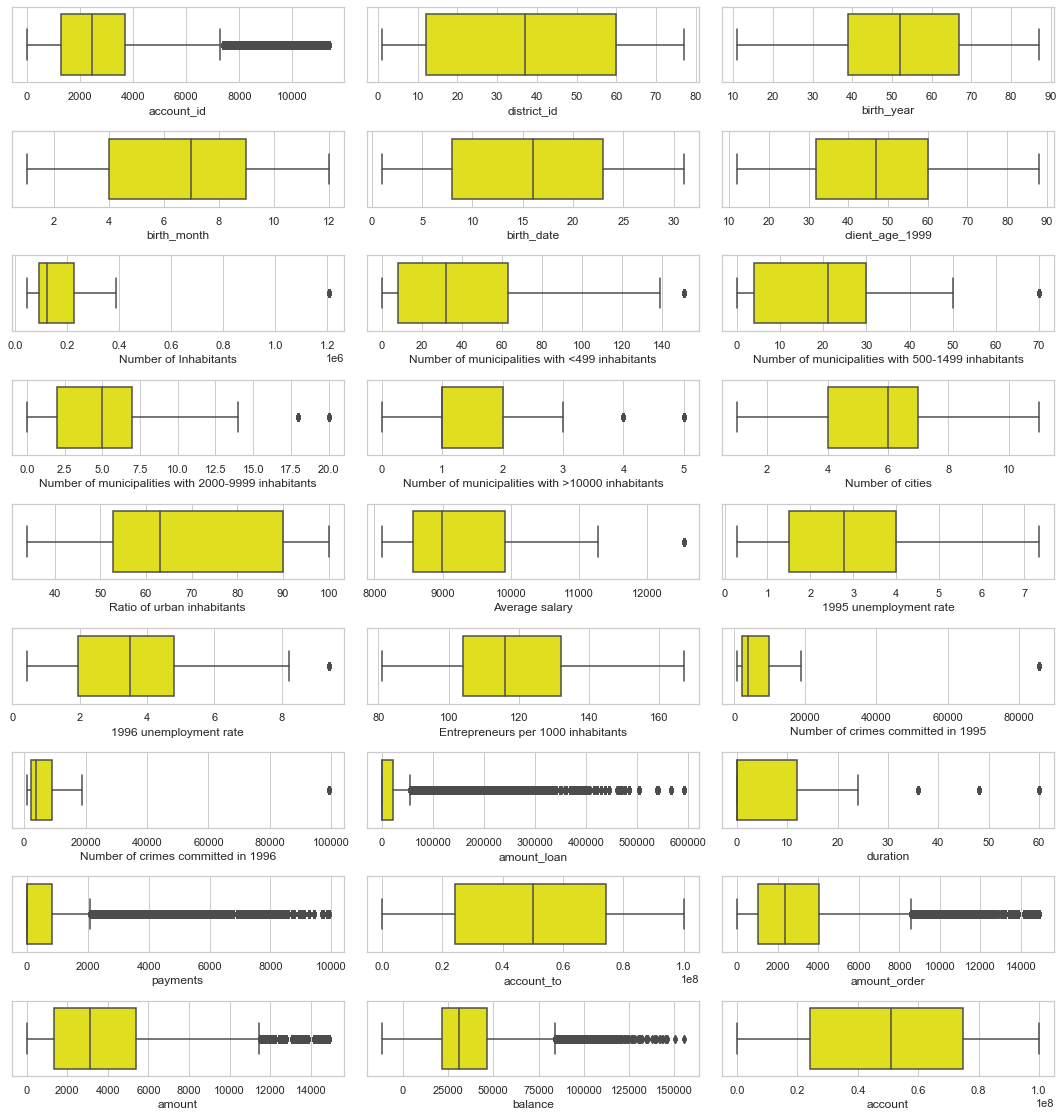

In [159]:
plt.figure(figsize=(15,17))
for i in range(0, len(numerical.columns)):
    ax = plt.subplot(10,3,i+1)
    sns.boxplot(numerical[numerical.columns[i]], color='yellow')
    plt.tight_layout()

- The boxplot graphs above show that 'account_id','Number of Inhabitants','Number of municipalities with <499 inhabitants','Number of municipalities with 500-1499 inhabitants','Number of municipalities with 2000-9999 inhabitants','Number of municipalities with >10000 inhabitants','Average salary','1996 unemployment rate','Number of crimes committed in 1995','Number of crimes committed in 1996','amount_loan','duration','payments','amount_order','amount','balance' have a distribution affected by outliers shown on the graph. The outliers are piled up at the right or left end
- 'Number of cities','birth_month','Ratio of urban inhabitants','Entrepreneurs per 1000 inhabitants' has an asymmetric distribution shown by median line that is not in the middle of interquartile range. However, there are no outliers on the graph. It may be affected by the number of modes that is more than 1 and imbalanced. The number of modes indicates there are different groups
- 'birth_year','client_age_1999','birth_date','district_id','1995 unemployment rate' tend to have a normal distribution shown by median line in the midle of IQR

##### Displot

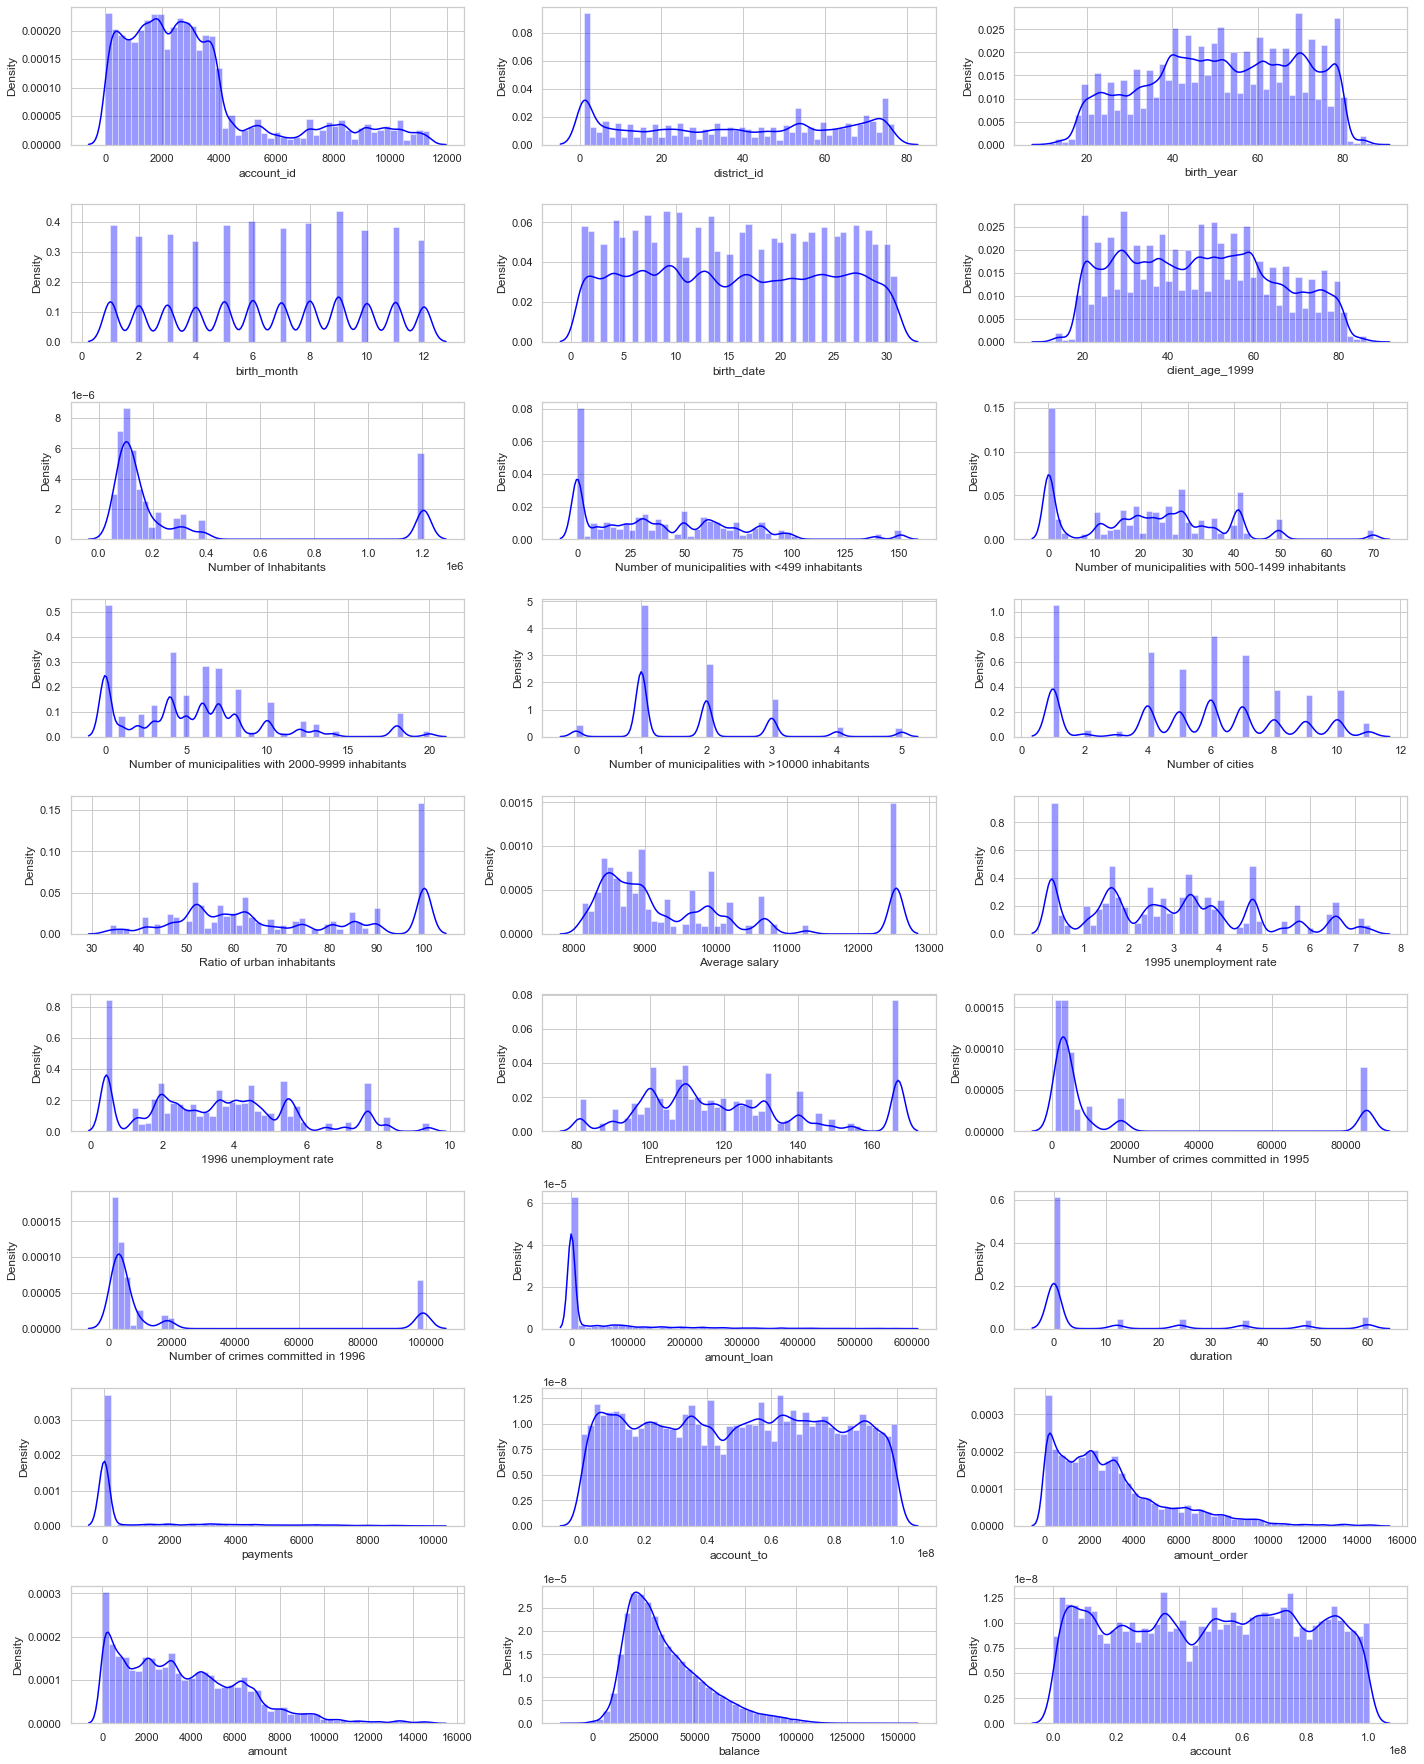

In [160]:
plt.figure(figsize=(20,27))
for i in range(0, len(numerical.columns)):
    ax = plt.subplot(10,3,i+1)
    sns.distplot(numerical[numerical.columns[i]], color='blue')
    plt.tight_layout()

### Multivariate Analysis

#####  Correlation Heatmap

In [161]:
# compute correlation

corr = df_merge.select_dtypes(include=['number']).corr(method = "pearson");
corr

,account_id,district_id,birth_year,birth_month,birth_date,client_age_1999,Number of Inhabitants,Number of municipalities with <499 inhabitants,Number of municipalities with 500-1499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Ratio of urban inhabitants,Average salary,1995 unemployment rate,1996 unemployment rate,Entrepreneurs per 1000 inhabitants,Number of crimes committed in 1995,Number of crimes committed in 1996,amount_loan,duration,payments,account_to,amount_order,amount,balance,account
account_id,1.000000,-0.050848,0.177376,-0.018627,-0.009946,-0.177376,0.056876,-0.001753,-0.022831,-0.044269,-0.019353,-0.056204,0.018246,0.042125,-0.018942,-0.019684,0.057552,0.057159,0.058035,0.495690,0.593400,0.527789,-0.007321,0.155860,0.099778,0.101571,-0.010728
district_id,-0.050848,1.000000,-0.033325,0.010578,0.005136,0.033325,-0.439165,0.012022,0.413388,0.439521,0.381897,0.249402,-0.173469,-0.442371,0.580309,0.582667,-0.675584,-0.491862,-0.503383,-0.023611,-0.007672,-0.005475,0.019257,-0.005194,-0.001663,0.017028,0.011595
birth_year,0.177376,-0.033325,1.000000,0.020907,-0.002060,-1.000000,0.034778,0.009726,-0.042787,-0.050712,-0.033056,-0.046421,0.023843,0.042921,-0.011393,-0.010874,0.034403,0.035751,0.035736,0.177917,0.190871,0.185003,-0.002305,0.085825,-0.071376,0.220842,-0.002009
birth_month,-0.018627,0.010578,0.020907,1.000000,-0.004891,-0.020907,-0.015508,0.024565,0.016627,-0.005138,0.002245,0.007850,-0.013960,-0.032684,-0.000192,-0.003031,-0.005292,-0.015530,-0.015190,-0.012827,-0.011918,-0.015992,-0.013334,-0.024459,-0.036113,-0.003984,0.002221
birth_date,-0.009946,0.005136,-0.002060,-0.004891,1.000000,0.002060,-0.014884,0.008418,0.016886,0.028113,-0.000256,0.015338,-0.024843,-0.012037,-0.003835,-0.002864,-0.000109,-0.015563,-0.015462,0.037820,0.014156,0.044062,-0.024948,-0.001863,-0.008209,-0.018373,-0.011582
client_age_1999,-0.177376,0.033325,-1.000000,-0.020907,0.002060,1.000000,-0.034778,-0.009726,0.042787,0.050712,0.033056,0.046421,-0.023843,-0.042921,0.011393,0.010874,-0.034403,-0.035751,-0.035736,-0.177917,-0.190871,-0.185003,0.002305,-0.085825,0.071376,-0.220842,0.002009
Number of Inhabitants,0.056876,-0.439165,0.034778,-0.015508,-0.014884,-0.034778,1.000000,-0.527663,-0.557620,-0.462215,-0.224206,-0.633706,0.680327,0.909771,-0.500108,-0.515986,0.724400,0.996325,0.995201,0.032821,0.003361,0.024374,-0.025101,0.018742,0.015654,0.002953,-0.032062
Number of municipalities with <499 inhabitants,-0.001753,0.012022,0.009726,0.024565,0.008418,-0.009726,-0.527663,1.000000,0.466988,0.102615,-0.057020,0.347875,-0.667687,-0.595341,0.055058,0.058493,-0.295811,-0.510047,-0.499943,0.034588,0.029172,0.044971,0.034219,-0.009324,-0.005359,-0.012800,0.040596
Number of municipalities with 500-1499 inhabitants,-0.022831,0.413388,-0.042787,0.016627,0.016886,0.042787,-0.557620,0.466988,1.000000,0.687898,0.151888,0.567397,-0.791444,-0.649454,0.176286,0.178519,-0.380914,-0.574760,-0.567054,0.016076,0.033764,0.015250,0.049752,0.002301,0.007982,0.019347,0.038099
Number of municipalities with 2000-9999 inhabitants,-0.044269,0.439521,-0.050712,-0.005138,0.028113,0.050712,-0.462215,0.102615,0.687898,1.000000,0.186901,0.664721,-0.551897,-0.473403,0.213653,0.227497,-0.424415,-0.497046,-0.492943,-0.005392,0.024484,-0.031503,0.020871,0.004531,-0.005040,0.016459,0.014899


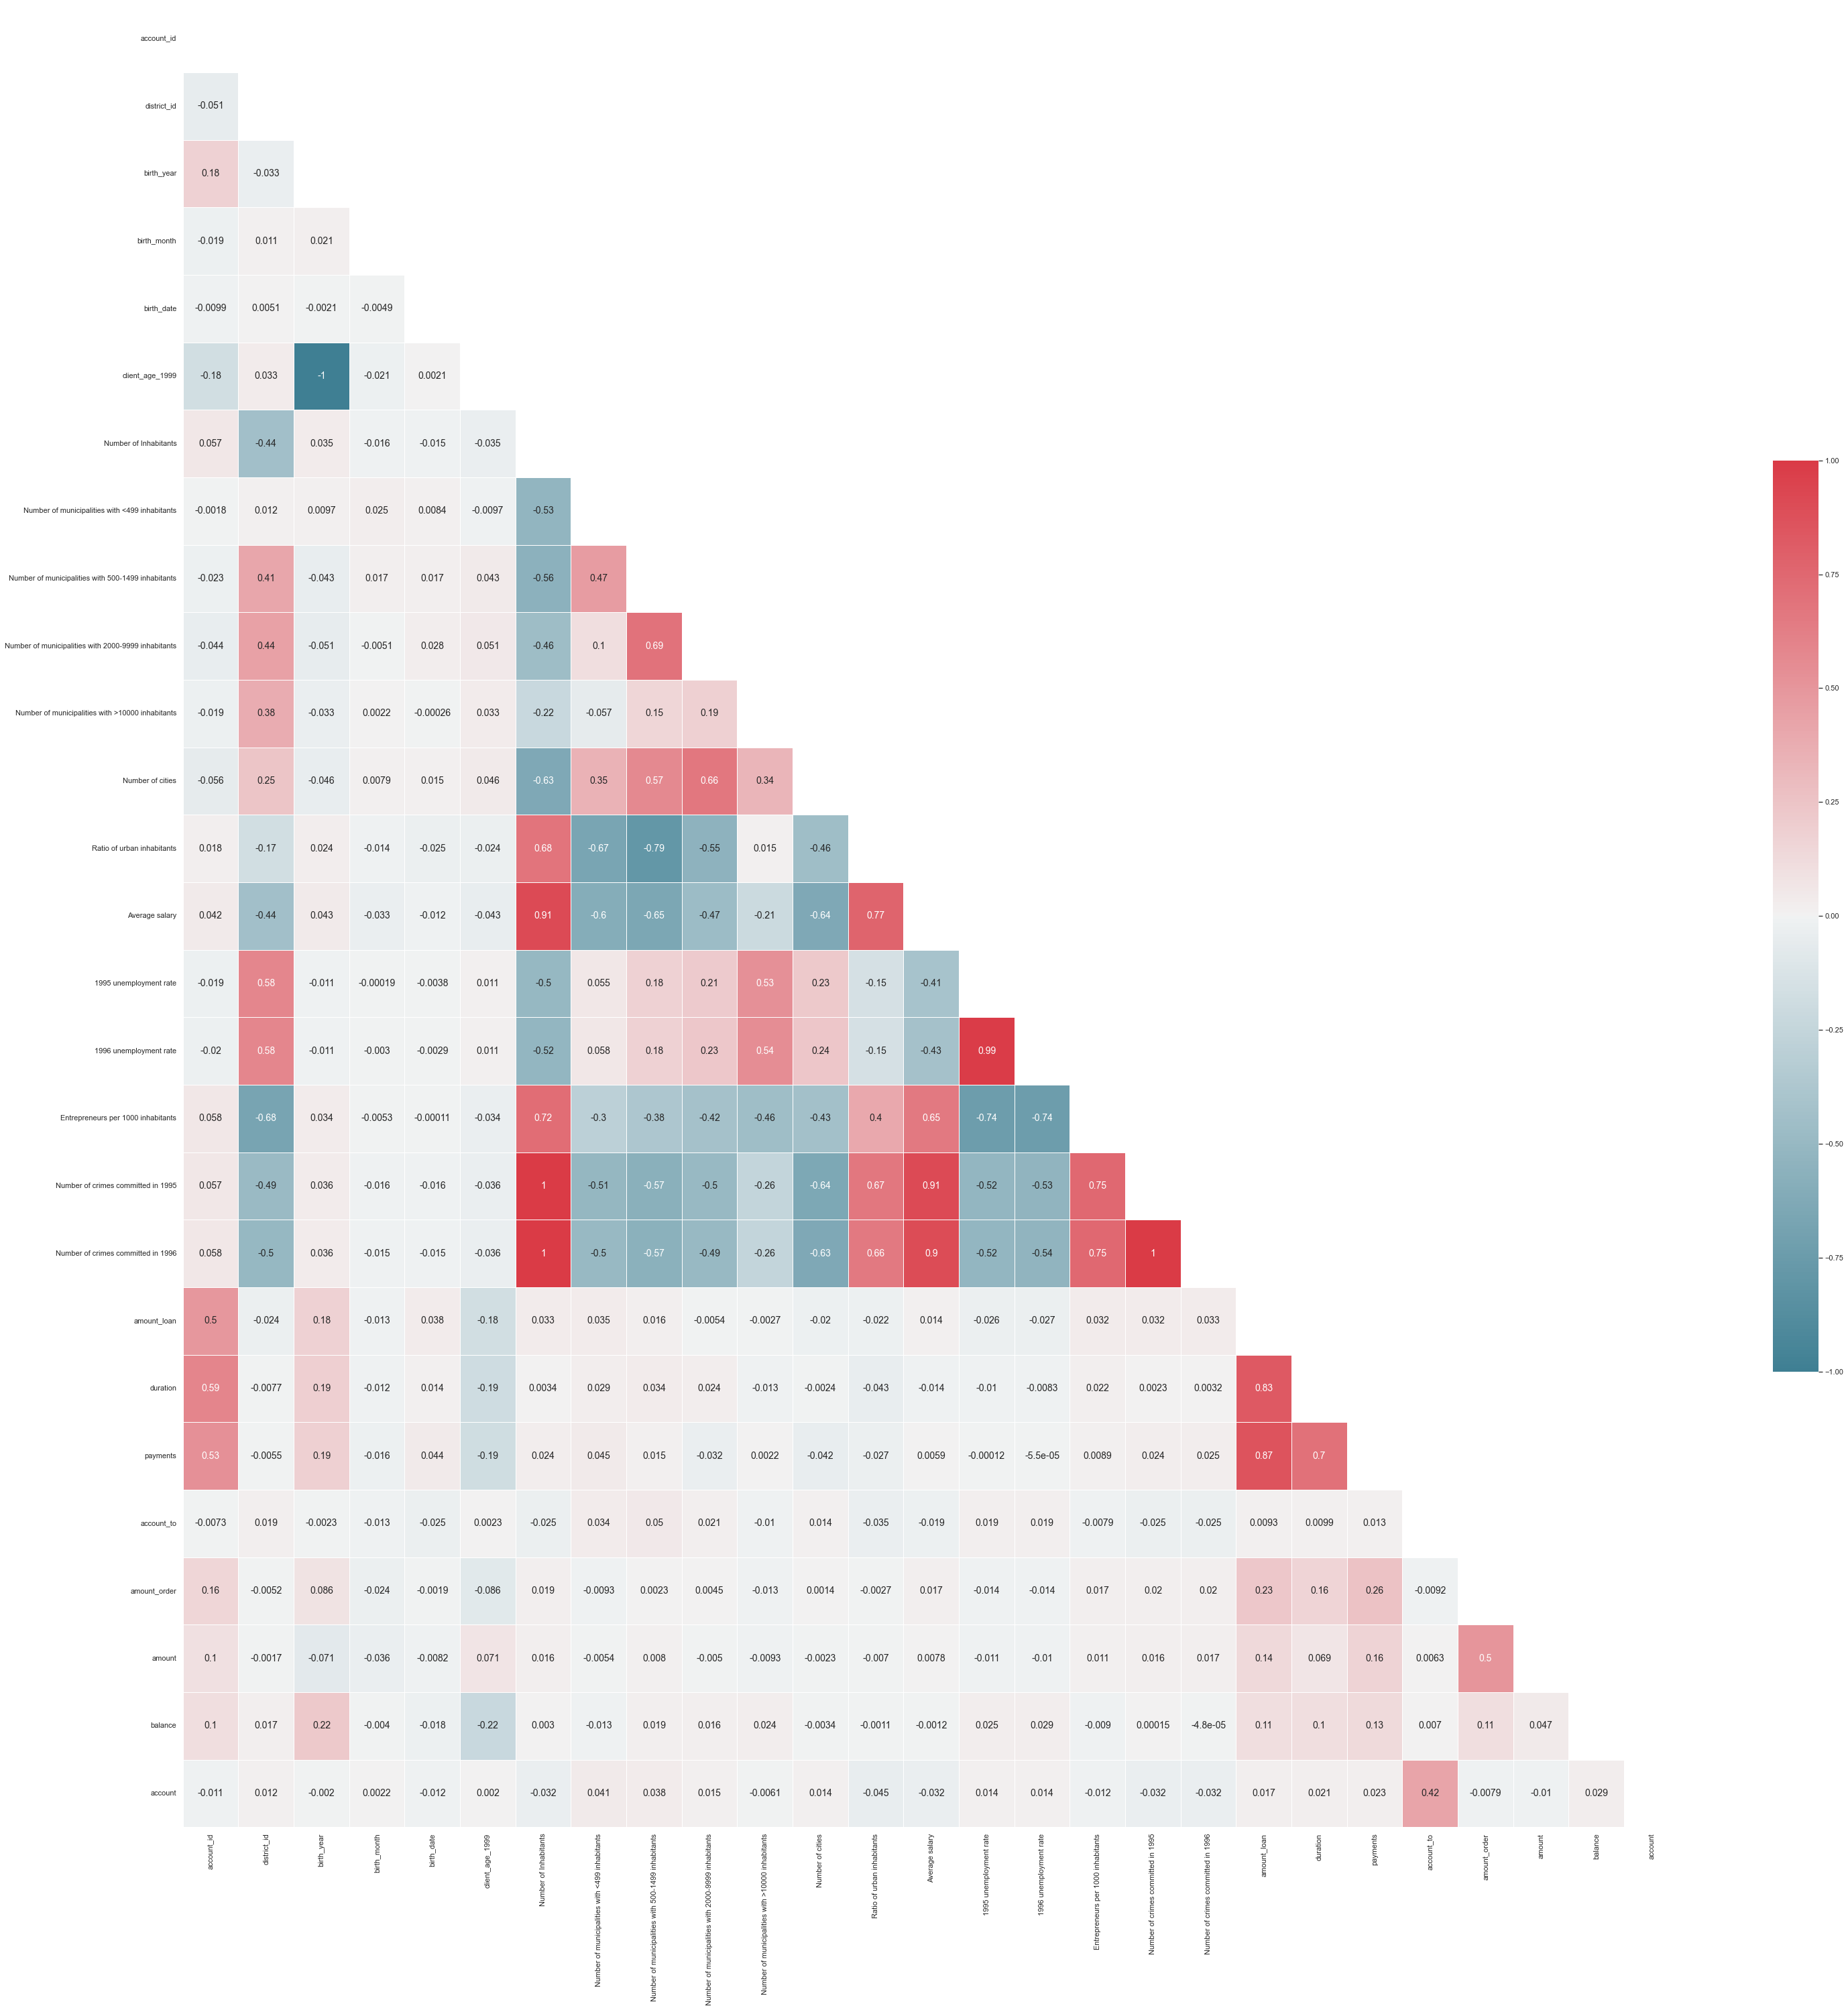

In [162]:
# mask for the upper triangle

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set figure size

f, ax = plt.subplots(figsize = (50,50))

# set colormap

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, 
           vmin = -1, vmax = 1, center = 0,

            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True);

In [163]:
df_merge.head(3)

,account_id,type_account,district_id,frequency,birth_year,birth_month,birth_date,client_gender,client_age_1999,type_card,District Name,Region Name,Number of Inhabitants,Number of municipalities with <499 inhabitants,Number of municipalities with 500-1499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Ratio of urban inhabitants,Average salary,1995 unemployment rate,1996 unemployment rate,Entrepreneurs per 1000 inhabitants,Number of crimes committed in 1995,Number of crimes committed in 1996,amount_loan,duration,payments,status,bank_to,account_to,amount_order,date_transaction,type,operation,amount,balance,k_symbol,bank,account
0,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,non cc holder,Pisek,south Bohemia,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,0.0,0.0,0.0,N,YZ,87144583.0,2452.0,1995-09-05,Withdrawal,Remittance to Another Bank,2452.0,19035.3,Household,YZ,87144583.0
1,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,non cc holder,Pisek,south Bohemia,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,0.0,0.0,0.0,N,YZ,87144583.0,2452.0,1995-10-05,Withdrawal,Remittance to Another Bank,2452.0,19639.2,Household,YZ,87144583.0
2,1,OWNER,18,MONTHLY ISSUANCE,70,12,13,Women,29,non cc holder,Pisek,south Bohemia,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.83,3.35,131.0,1740.0,1910.0,0.0,0.0,0.0,N,YZ,87144583.0,2452.0,1995-11-05,Withdrawal,Remittance to Another Bank,2452.0,18042.1,Household,YZ,87144583.0


In [164]:
df_merge.drop(['district_id','birth_year','birth_month','birth_date','Number of Inhabitants','Number of municipalities with 500-1499 inhabitants','Ratio of urban inhabitants','Number of crimes committed in 1995','Number of crimes committed in 1996','1995 unemployment rate','Entrepreneurs per 1000 inhabitants'], axis=1, inplace=True)

In [165]:
df_merge.head(3)

,account_id,type_account,frequency,client_gender,client_age_1999,type_card,District Name,Region Name,Number of municipalities with <499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Average salary,1996 unemployment rate,amount_loan,duration,payments,status,bank_to,account_to,amount_order,date_transaction,type,operation,amount,balance,k_symbol,bank,account
0,1,OWNER,MONTHLY ISSUANCE,Women,29,non cc holder,Pisek,south Bohemia,60.0,2.0,1.0,4.0,8968.0,3.35,0.0,0.0,0.0,N,YZ,87144583.0,2452.0,1995-09-05,Withdrawal,Remittance to Another Bank,2452.0,19035.3,Household,YZ,87144583.0
1,1,OWNER,MONTHLY ISSUANCE,Women,29,non cc holder,Pisek,south Bohemia,60.0,2.0,1.0,4.0,8968.0,3.35,0.0,0.0,0.0,N,YZ,87144583.0,2452.0,1995-10-05,Withdrawal,Remittance to Another Bank,2452.0,19639.2,Household,YZ,87144583.0
2,1,OWNER,MONTHLY ISSUANCE,Women,29,non cc holder,Pisek,south Bohemia,60.0,2.0,1.0,4.0,8968.0,3.35,0.0,0.0,0.0,N,YZ,87144583.0,2452.0,1995-11-05,Withdrawal,Remittance to Another Bank,2452.0,18042.1,Household,YZ,87144583.0


### Customer Segementation

#### Agglomerative Clustering

In [166]:
customers = df_merge.copy().sample(frac = 0.05) 

In [167]:
customers.head(2)

,account_id,type_account,frequency,client_gender,client_age_1999,type_card,District Name,Region Name,Number of municipalities with <499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Average salary,1996 unemployment rate,amount_loan,duration,payments,status,bank_to,account_to,amount_order,date_transaction,type,operation,amount,balance,k_symbol,bank,account
354561,4774,DISPONENT,MONTHLY ISSUANCE,Women,58,non cc holder,Zdar nad Sazavou,south Moravia,151.0,2.0,3.0,5.0,8512.0,4.12,465072.0,48.0,9689.0,OK THUS-FAR,EF,85673802.0,9689.0,1998-08-12,Withdrawal,Remittance to Another Bank,9689.0,52054.9,Loan Payment,EF,85673802.0
91828,1437,OWNER,MONTHLY ISSUANCE,Women,30,non cc holder,Svitavy,east Bohemia,75.0,2.0,3.0,6.0,8187.0,5.45,0.0,0.0,0.0,N,OP,22823983.0,314.0,1996-01-10,Withdrawal,Remittance to Another Bank,1753.0,24018.5,Household,ST,58229595.0


In [168]:
customers[(customers['Region Name']=='south Moravia') & (customers['District Name'].isin(['Trebic','Blansko']))].head()

,account_id,type_account,frequency,client_gender,client_age_1999,type_card,District Name,Region Name,Number of municipalities with <499 inhabitants,Number of municipalities with 2000-9999 inhabitants,Number of municipalities with >10000 inhabitants,Number of cities,Average salary,1996 unemployment rate,amount_loan,duration,payments,status,bank_to,account_to,amount_order,date_transaction,type,operation,amount,balance,k_symbol,bank,account
201538,2555,DISPONENT,MONTHLY ISSUANCE,Men,51,non cc holder,Blansko,south Moravia,88.0,6.0,2.0,7.0,8240.0,3.56,0.0,0.0,0.0,N,AB,73481118.0,2261.0,1995-11-06,Withdrawal,Remittance to Another Bank,5464.0,50132.5,Household,QR,57132226.0
69758,1241,OWNER,MONTHLY ISSUANCE,Women,51,non cc holder,Blansko,south Moravia,88.0,6.0,2.0,7.0,8240.0,3.56,0.0,0.0,0.0,N,EF,97685855.0,1368.0,1997-06-12,Withdrawal,Remittance to Another Bank,1368.0,30314.1,Household,EF,97685855.0
154737,2052,OWNER,MONTHLY ISSUANCE,Women,38,classic,Trebic,south Moravia,139.0,5.0,1.0,6.0,8814.0,5.74,0.0,0.0,0.0,N,EF,4608887.0,4278.0,1995-09-11,Withdrawal,Remittance to Another Bank,263.0,46833.6,Insurance Payment,OP,20428276.0
115581,1699,OWNER,MONTHLY ISSUANCE,Men,73,non cc holder,Blansko,south Moravia,88.0,6.0,2.0,7.0,8240.0,3.56,0.0,0.0,0.0,N,EF,2504826.0,19.0,1993-08-05,Credit,Collection from Another Bank,5224.0,29040.8,Old-age Pension,CD,94008880.0
198055,2535,DISPONENT,MONTHLY ISSUANCE,Women,34,non cc holder,Trebic,south Moravia,139.0,5.0,1.0,6.0,8814.0,5.74,0.0,0.0,0.0,N,QR,20700508.0,90.0,1997-06-09,Withdrawal,Remittance to Another Bank,153.0,36019.6,Insurance Payment,QR,5892384.0


In [169]:
# remove irrelevant features1996 unemployment rate
customers.drop(['date_transaction','bank_to','account_id','account_to','account','District Name','Number of municipalities with <499 inhabitants','Number of municipalities with 2000-9999 inhabitants','Number of municipalities with >10000 inhabitants','Number of cities','1996 unemployment rate'], axis=1, inplace=True)

##### a. Feature Encoding

In [170]:
# check categorical columns
customers.select_dtypes(exclude=['number']).head(1)

,type_account,frequency,client_gender,type_card,Region Name,status,type,operation,k_symbol,bank
354561,DISPONENT,MONTHLY ISSUANCE,Women,non cc holder,south Moravia,OK THUS-FAR,Withdrawal,Remittance to Another Bank,Loan Payment,EF


In [171]:
customers['bank'].value_counts()

AB    1781
ST    1721
YZ    1709
KL    1696
EF    1677
UV    1661
QR    1659
CD    1581
IJ    1523
GH    1517
OP    1478
WX    1473
MN    1420
Name: bank, dtype: int64

In [172]:
customers_std = customers.copy()

In [173]:
# One-hot Encoding
def onehot_encode(data, column):
    dummies = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)
    return data

for column in ['frequency','Region Name','k_symbol','bank']:
        customers_std = onehot_encode(customers_std, column=column)

In [174]:
# Label Encoding
for column in ['type_account','client_gender','type_card','status','type','operation']:
        customers_std[column] = customers_std[column].astype('category').cat.codes

customers_std.head(2)

,type_account,client_gender,client_age_1999,type_card,Average salary,amount_loan,duration,payments,status,amount_order,type,operation,amount,balance,frequency_ISSUANCE AFTER TRANSACTION,frequency_MONTHLY ISSUANCE,frequency_WEEKLY ISSUANCE,Region Name_Prague,Region Name_central Bohemia,Region Name_east Bohemia,Region Name_north Bohemia,Region Name_north Moravia,Region Name_south Bohemia,Region Name_south Moravia,Region Name_west Bohemia,k_symbol_Household,k_symbol_Insurance Payment,k_symbol_Loan Payment,k_symbol_Old-age Pension,bank_AB,bank_CD,bank_EF,bank_GH,bank_IJ,bank_KL,bank_MN,bank_OP,bank_QR,bank_ST,bank_UV,bank_WX,bank_YZ
354561,0,1,58,3,8512.0,465072.0,48.0,9689.0,4,9689.0,1,1,9689.0,52054.9,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
91828,1,1,30,3,8187.0,0.0,0.0,0.0,2,314.0,1,1,1753.0,24018.5,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##### b. Normalisation/Standardisation/Robustscaler

In [175]:
# check numerical columns
customers.select_dtypes(include=['number']).head(1)

,client_age_1999,Average salary,amount_loan,duration,payments,amount_order,amount,balance
354561,58,8512.0,465072.0,48.0,9689.0,9689.0,9689.0,52054.9


In [176]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [177]:
# Using standardisation for normal distribution assumption of data 

std_columns = ['client_age_1999','type_account','client_gender','type_card','status','type','operation']

for i in std_columns:
    customers_std[i] = StandardScaler().fit_transform(customers_std[i].values.reshape(len(customers_std),1))

In [178]:
# Using robustscaler for handle outliers 

otlr_columns = ['Average salary','amount_loan','duration','payments','amount_order','amount','balance']

for i in otlr_columns:
    customers_std[i] = RobustScaler(quantile_range = (25.0, 75.0)).fit_transform(customers_std[i].values.reshape(len(customers_std),1))

In [179]:
# Using normalisation for distribution that is non normal assumption 

norm_columns = ['Average salary','amount_loan','duration','payments','amount_order','amount','balance']

for i in norm_columns:
    customers_std[i] = MinMaxScaler().fit_transform(customers_std[i].values.reshape(len(customers_std),1))

In [180]:
customers_std.head(3)

,type_account,client_gender,client_age_1999,type_card,Average salary,amount_loan,duration,payments,status,amount_order,type,operation,amount,balance,frequency_ISSUANCE AFTER TRANSACTION,frequency_MONTHLY ISSUANCE,frequency_WEEKLY ISSUANCE,Region Name_Prague,Region Name_central Bohemia,Region Name_east Bohemia,Region Name_north Bohemia,Region Name_north Moravia,Region Name_south Bohemia,Region Name_south Moravia,Region Name_west Bohemia,k_symbol_Household,k_symbol_Insurance Payment,k_symbol_Loan Payment,k_symbol_Old-age Pension,bank_AB,bank_CD,bank_EF,bank_GH,bank_IJ,bank_KL,bank_MN,bank_OP,bank_QR,bank_ST,bank_UV,bank_WX,bank_YZ
354561,-2.109546,0.980286,0.614281,0.398042,0.090724,0.787164,0.8,0.977699,2.176027,0.651032,0.355112,0.355112,0.651032,0.410714,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
91828,0.474036,0.980286,-0.993623,0.398042,0.017378,0.000000,0.0,0.000000,-0.481887,0.021034,0.355112,0.355112,0.117734,0.229481,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
397506,-2.109546,-1.020110,0.212305,0.398042,1.000000,0.082380,0.6,0.136428,0.847070,0.007661,0.355112,0.355112,0.007661,0.270432,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Determine Cluster Number

In [181]:
from sklearn.cluster import AgglomerativeClustering # For HAC clustering
import scipy.cluster.hierarchy as sch # For HAC Denddrogram

In [182]:
# Select attributes
X = customers_std

# Create a figure
#plt.figure(figsize=(16,9), dpi=300)

# Create linkage
#Z = sch.linkage(X, method='ward', optimal_ordering=True) 

# Draw a dendrogram
#sch.dendrogram(Z, leaf_rotation=90, leaf_font_size=10, 
               #color_threshold=50, above_threshold_color='black')
 
# Add horizontal line
#plt.axhline(y=50, c='grey', lw=1, linestyle='dashed')

# Show the plot
#plt.show()

### Modeling

In [183]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean')
clust = model.fit(X)

In [184]:
customers_std['clusters'] = clust.labels_
customers['clusters'] = clust.labels_

In [185]:
customers.head(3)

,type_account,frequency,client_gender,client_age_1999,type_card,Region Name,Average salary,amount_loan,duration,payments,status,amount_order,type,operation,amount,balance,k_symbol,bank,clusters
354561,DISPONENT,MONTHLY ISSUANCE,Women,58,non cc holder,south Moravia,8512.0,465072.0,48.0,9689.0,OK THUS-FAR,9689.0,Withdrawal,Remittance to Another Bank,9689.0,52054.9,Loan Payment,EF,1
91828,OWNER,MONTHLY ISSUANCE,Women,30,non cc holder,east Bohemia,8187.0,0.0,0.0,0.0,N,314.0,Withdrawal,Remittance to Another Bank,1753.0,24018.5,Household,ST,5
397506,DISPONENT,MONTHLY ISSUANCE,Men,51,non cc holder,Prague,12541.0,48672.0,36.0,1352.0,NO PROBLEMS,115.0,Withdrawal,Remittance to Another Bank,115.0,30353.6,Insurance Payment,IJ,1


### Interpret The Segment

In [186]:
customers.groupby(['clusters'])['client_age_1999','Average salary','amount_loan','duration','payments'].agg(['count','mean']).T

clusters                           0             1             2            3  \
client_age_1999 count    3361.000000   3327.000000   2609.000000  2340.000000   
                mean       40.720619     45.577998     43.604063    71.802137   
Average salary  count    3361.000000   3327.000000   2609.000000  2340.000000   
                mean     9551.403154   9620.400962   9459.670755  9539.425214   
amount_loan     count    3361.000000   3327.000000   2609.000000  2340.000000   
                mean   141070.757513  47598.658251  36520.167114     0.000000   
duration        count    3361.000000   3327.000000   2609.000000  2340.000000   
                mean       38.256471     10.997295     10.040629     0.000000   
payments        count    3361.000000   3327.000000   2609.000000  2340.000000   
                mean     3743.699494   1403.269612   1242.963204     0.000000   

clusters                         4             5  
client_age_1999 count  4355.000000   4904.000000  
                mean     47.355224     43.215742  
Average salary  count  4355.000000   4904.000000  
                mean   9491.447532   9657.132749  
amount_loan     count  4355.000000   4904.000000  
                mean    319.657405  15146.180261  
duration        count  4355.000000   4904.000000  
                mean      0.187371      2.623165  
payments        count  4355.000000   4904.000000  
                mean     19.445006    352.221044

In [187]:
customers.groupby(['clusters','type_account'])['clusters'].agg(['count'])

count
clusters type_account       
0        OWNER          3361
1        DISPONENT      3327
2        OWNER          2609
3        DISPONENT       507
         OWNER          1833
4        OWNER          4355
5        OWNER          4904

In [188]:
customers.groupby(['clusters','client_gender'])['clusters'].agg(['count'])

count
clusters client_gender       
0        Men             1650
         Women           1711
1        Men             1681
         Women           1646
2        Men             1326
         Women           1283
3        Men             1165
         Women           1175
4        Men             4355
5        Men               63
         Women           4841

In [189]:
customers.groupby(['clusters','status'])['clusters'].agg(['count'])

count
clusters status               
0        NO PROBLEMS      1395
         OK THUS-FAR      1966
1        N                2256
         NO PROBLEMS       581
         OK THUS-FAR       490
2        CLIENT IN DEBT      5
         LOAN NOT PAID      25
         N                1815
         NO PROBLEMS       404
         OK THUS-FAR       360
3        N                2340
4        LOAN NOT PAID      17
         N                4321
         NO PROBLEMS        17
5        CLIENT IN DEBT    171
         LOAN NOT PAID     115
         N                4561
         NO PROBLEMS        57

In [190]:
customers.groupby(['clusters','type'])['clusters'].agg(['count'])

,,count
clusters,type,
0,Withdrawal,3361
1,Withdrawal,3327
2,Withdrawal,2609
3,Credit,2340
4,Withdrawal,4355
5,Withdrawal,4904


In [191]:
customers.groupby(['clusters','operation'])['clusters'].agg(['count'])

,,count
clusters,operation,
0,Remittance to Another Bank,3361
1,Remittance to Another Bank,3327
2,Remittance to Another Bank,2609
3,Collection from Another Bank,2340
4,Remittance to Another Bank,4355
5,Remittance to Another Bank,4904


In [192]:
customers.groupby(['clusters','k_symbol'])['clusters'].agg(['count'])

count
clusters k_symbol                
0        Household           1612
         Insurance Payment    619
         Loan Payment        1130
1        Household           2293
         Insurance Payment    681
         Loan Payment         353
2        Household           1770
         Insurance Payment    588
         Loan Payment         251
3        Old-age Pension     2340
4        Household           3407
         Insurance Payment    948
5        Household           3564
         Insurance Payment   1223
         Loan Payment         117

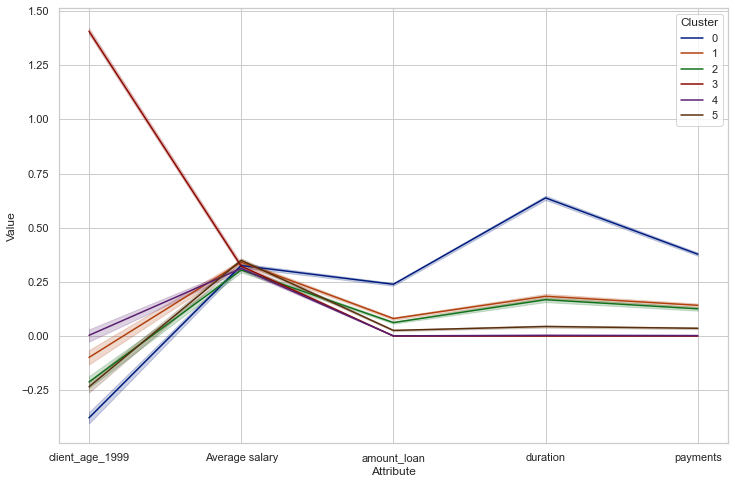

In [193]:
# Create the dataframe
df_normalized = customers_std[['client_age_1999','Average salary','amount_loan','duration','payments']]
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = clust.labels_

# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['client_age_1999','Average salary','amount_loan','duration','payments'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

# Visualize it
plt.figure(figsize=(12,8))
sns.lineplot('Attribute', 'Value', hue='Cluster', palette='dark', data=df_nor_melt)
plt.show()

- cluster 0: ***Insufficient credit history***
    - young age
    - moderate loan amount
    - moderate duration
    - all gender
    - mostly non-cc holders
    - the majority of loan statuses are 'no loan', 'no problems', and 'OK thus far'
    - withdrawal
    - mostly household and insurance payments
- cluster 1: ***student loans***
    - the youngest age
    - the largest loan amount
    - long duration
    - all gender
    - mostly non-cc and junior card
    - the majority of loan statuses are 'no problems', 'OK thus-far', and 'loan not payed'
    - withdrawal
    - mostly household and loan payment
- cluster 2: ***secured debt holders***
    - young age
    - moderate loan amount
    - moderate duration
    - all gender
    - mostly classic and gold card 
    - the majority of loan statuses are 'no problems' and 'OK thus-far'
    - withdrawal
    - mostly household and insurance payments
- cluster 3: ***fall behind on payments***
    - oldest age
    - the lowest loan amount
    - short duration
    - all gender
    - mostly non cc
    - no loan status
    - collection from another bank
    - credit
    - pension
- cluster 4: ***young debtor women***
    - young age
    - the lowest loan amount
    - short duration
    - women
    - mostly non cc and junior card
    - no loan status
    - withdrawal
    - mostly household
- cluster 5: ***young debtor men***
    - young age
    - the lowest loan amount
    - short duration
    - men
    - mostly non cc and junior card
    - no loan status
    - withdrawal
    - mostly household

### Business Recommendation

- cluster 0: ***Insufficient credit history***
  - Good candidates
  - Ask to use credit card
- cluster 1: ***Student loans***
  - Need to watch carefully
- cluster 2: ***Secured debt holders***
  - Good clients
  - Ask to add credit card
- cluster 3: ***Fall behind on payments***
  - Offer to help with financial planning
- cluster 4: ***Young debtor women***
  - Offer some additional services
- cluster 5: ***Young debtor men***
  - Offer some additional services

### K-Means

In [194]:
customers.head(1)

,type_account,frequency,client_gender,client_age_1999,type_card,Region Name,Average salary,amount_loan,duration,payments,status,amount_order,type,operation,amount,balance,k_symbol,bank,clusters
354561,DISPONENT,MONTHLY ISSUANCE,Women,58,non cc holder,south Moravia,8512.0,465072.0,48.0,9689.0,OK THUS-FAR,9689.0,Withdrawal,Remittance to Another Bank,9689.0,52054.9,Loan Payment,EF,1


In [195]:
customers_std.head(1)

,type_account,client_gender,client_age_1999,type_card,Average salary,amount_loan,duration,payments,status,amount_order,type,operation,amount,balance,frequency_ISSUANCE AFTER TRANSACTION,frequency_MONTHLY ISSUANCE,frequency_WEEKLY ISSUANCE,Region Name_Prague,Region Name_central Bohemia,Region Name_east Bohemia,Region Name_north Bohemia,Region Name_north Moravia,Region Name_south Bohemia,Region Name_south Moravia,Region Name_west Bohemia,k_symbol_Household,k_symbol_Insurance Payment,k_symbol_Loan Payment,k_symbol_Old-age Pension,bank_AB,bank_CD,bank_EF,bank_GH,bank_IJ,bank_KL,bank_MN,bank_OP,bank_QR,bank_ST,bank_UV,bank_WX,bank_YZ,clusters
354561,-2.109546,0.980286,0.614281,0.398042,0.090724,0.787164,0.8,0.977699,2.176027,0.651032,0.355112,0.355112,0.651032,0.410714,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [196]:
customers2 = customers.drop(['clusters'], axis=1)
customers_std2 = customers_std.drop(['clusters'], axis=1)

### Determine Cluster Number

##### Elbow Method

In [198]:
from sklearn import cluster

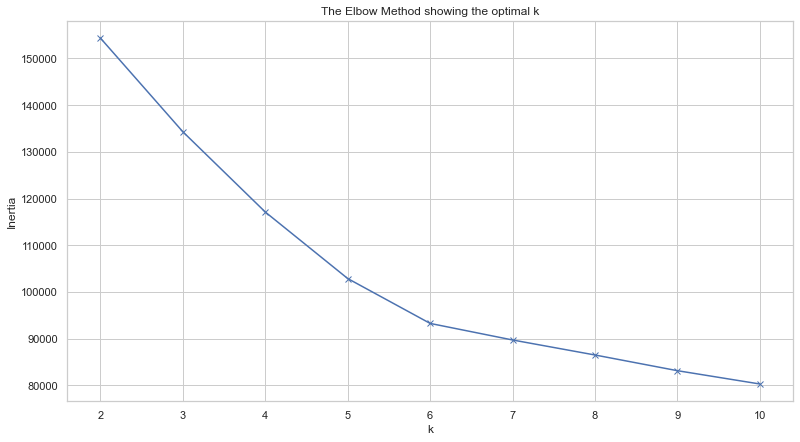

In [199]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(customers_std2)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(13,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 ### Modeling

In [200]:
cluster_model = cluster.KMeans(n_clusters=6, random_state=42)
cluster_model.fit(customers_std2)

KMeans(n_clusters=6, random_state=42)

In [201]:
customers_std2['clusters'] = cluster_model.labels_
customers2['clusters'] = cluster_model.labels_

### Interpret Segment

In [202]:
customers2.groupby(['clusters'])['client_age_1999','Average salary','amount_loan','duration','payments'].agg(['count','mean']).T

clusters                           0            1             2            3  \
client_age_1999 count    2788.000000  4818.000000   2541.000000  2340.000000   
                mean       39.912841    47.191781     43.888233    71.802137   
Average salary  count    2788.000000  4818.000000   2541.000000  2340.000000   
                mean     9380.825323  9522.215235   9463.998819  9539.425214   
amount_loan     count    2788.000000  4818.000000   2541.000000  2340.000000   
                mean   177519.271162  9568.149440  34360.458087     0.000000   
duration        count    2788.000000  4818.000000   2541.000000  2340.000000   
                mean       46.489240     2.547945      9.520661     0.000000   
payments        count    2788.000000  4818.000000   2541.000000  2340.000000   
                mean     3784.345050   416.600042   1173.179850     0.000000   

clusters                          4             5  
client_age_1999 count   2867.000000   5542.000000  
                mean      46.384025     42.813966  
Average salary  count   2867.000000   5542.000000  
                mean    9664.738403   9688.714183  
amount_loan     count   2867.000000   5542.000000  
                mean   19831.613533  21338.760736  
duration        count   2867.000000   5542.000000  
                mean       4.779909      4.557921  
payments        count   2867.000000   5542.000000  
                mean     930.586327    739.650668

In [203]:
customers2.groupby(['clusters','type_account'])['clusters'].agg(['count'])

count
clusters type_account       
0        DISPONENT       460
         OWNER          2328
1        OWNER          4818
2        OWNER          2541
3        DISPONENT       507
         OWNER          1833
4        DISPONENT      2867
5        OWNER          5542

In [204]:
customers2.groupby(['clusters','client_gender'])['clusters'].agg(['count'])

count
clusters client_gender       
0        Men             1477
         Women           1311
1        Men             4818
2        Men             1322
         Women           1219
3        Men             1165
         Women           1175
4        Men             1458
         Women           1409
5        Women           5542

In [205]:
customers2.groupby(['clusters','type_card'])['clusters'].agg(['count'])

count
clusters type_card           
0        gold              29
         junior           128
         non cc holder   2631
1        junior           153
         non cc holder   4665
2        classic         2255
         gold             286
3        classic           43
         gold              10
         non cc holder   2287
4        non cc holder   2867
5        gold               1
         junior           183
         non cc holder   5358

In [206]:
customers2.groupby(['clusters','status'])['clusters'].agg(['count'])

count
clusters status               
0        NO PROBLEMS       333
         OK THUS-FAR      2455
1        CLIENT IN DEBT     41
         LOAN NOT PAID      39
         N                4311
         NO PROBLEMS       427
2        CLIENT IN DEBT      5
         N                1801
         NO PROBLEMS       404
         OK THUS-FAR       331
3        N                2340
4        N                2256
         NO PROBLEMS       581
         OK THUS-FAR        30
5        CLIENT IN DEBT    130
         LOAN NOT PAID     118
         N                4585
         NO PROBLEMS       709

In [207]:
customers2.groupby(['clusters','type'])['clusters'].agg(['count'])

,,count
clusters,type,
0,Withdrawal,2788
1,Withdrawal,4818
2,Withdrawal,2541
3,Credit,2340
4,Withdrawal,2867
5,Withdrawal,5542


In [208]:
customers2.groupby(['clusters','operation'])['clusters'].agg(['count'])

,,count
clusters,operation,
0,Remittance to Another Bank,2788
1,Remittance to Another Bank,4818
2,Remittance to Another Bank,2541
3,Collection from Another Bank,2340
4,Remittance to Another Bank,2867
5,Remittance to Another Bank,5542


In [209]:
customers2.groupby(['clusters','k_symbol'])['clusters'].agg(['count'])

count
clusters k_symbol                
0        Household           1174
         Insurance Payment    438
         Loan Payment        1176
1        Household           3666
         Insurance Payment   1056
         Loan Payment          96
2        Household           1750
         Insurance Payment    555
         Loan Payment         236
3        Old-age Pension     2340
4        Household           2077
         Insurance Payment    627
         Loan Payment         163
5        Household           3979
         Insurance Payment   1383
         Loan Payment         180